# ec-smc 

In [1]:
import scanpy as sc
import os

In [2]:
import numpy as np
import pandas as pd
adata = sc.read_h5ad('/nfs/team205/ac65/vasculature/after_annotation/annotated_objects/cpdb_in_stat/adata_for_cpdb_log1p.h5ad')

In [3]:
os.chdir(os.path.expanduser("/nfs/team205/ac65/vasculature/after_annotation/vascular_atlas/interactions/jhub_notebooks/figs_stat/"))
output_p = '/nfs/team205/ac65/vasculature/after_annotation/vascular_atlas/interactions/jhub_notebooks/figs_stat/'

In [4]:
adata

AnnData object with n_obs × n_vars = 56176 × 30021
    obs: 'organ_uni', 'donor', 'kit', 'sorting', 'location', 'age', 'gender', 'dissociation', 'ann_ec_states', 'ann_mural_final', 'ann_final', 'ann_final_2', 'Organ', 'Organ_celltype', 'celltype'
    var: 'mt', 'rb', 'n_cells', 'gene_ids-0', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'highly_variable-0', 'highly_variable_rank-0', 'means-0', 'variances-0', 'variances_norm-0', 'highly_variable_nbatches-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'ENSG_id-1', 'gene_name_33538-1', 'gene_name_33694-1', 'gene_names_hg_v1.2-0-0-1', 'highly_variable-1', 'highly_variable_rank-1', 'means-1', 'variances-1', 'variances_norm-1', 'highly_variable_nbatches-1'
    uns: 'log1p'

In [5]:
adata = adata[adata.obs['ann_final_2'].isin(['art_ec_1', 'art_ec_2', 'art_smc'])]

In [6]:
adata = adata[adata.obs['organ_uni'].isin(['heart', 'large_intestine', 'small_intestine', "lymph_node"])]

In [7]:
adata

View of AnnData object with n_obs × n_vars = 3058 × 30021
    obs: 'organ_uni', 'donor', 'kit', 'sorting', 'location', 'age', 'gender', 'dissociation', 'ann_ec_states', 'ann_mural_final', 'ann_final', 'ann_final_2', 'Organ', 'Organ_celltype', 'celltype'
    var: 'mt', 'rb', 'n_cells', 'gene_ids-0', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'highly_variable-0', 'highly_variable_rank-0', 'means-0', 'variances-0', 'variances_norm-0', 'highly_variable_nbatches-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'ENSG_id-1', 'gene_name_33538-1', 'gene_name_33694-1', 'gene_names_hg_v1.2-0-0-1', 'highly_variable-1', 'highly_variable_rank-1', 'means-1', 'variances-1', 'variances_norm-1', 'highly_variable_nbatches-1'
    uns: 'log1p'

In [8]:
np.unique(adata.obs['Organ_celltype'])

array(['Heart_art_ec_1', 'Heart_art_ec_2', 'Heart_art_smc',
       'Large_intestine_art_ec_1', 'Large_intestine_art_ec_2',
       'Large_intestine_art_smc', 'Lymph_node_art_ec_1',
       'Lymph_node_art_ec_2', 'Lymph_node_art_smc',
       'Small_intestine_art_ec_1', 'Small_intestine_art_ec_2',
       'Small_intestine_art_smc'], dtype=object)

In [9]:
# Define the desired order of categories
desired_order = ['Heart_art_ec_1','Lymph_node_art_ec_1', 'Large_intestine_art_ec_1', 'Small_intestine_art_ec_1', 
                'Heart_art_ec_2', 'Lymph_node_art_ec_2', 'Large_intestine_art_ec_2',  'Small_intestine_art_ec_2', 
                'Heart_art_smc','Lymph_node_art_smc','Large_intestine_art_smc', 'Small_intestine_art_smc', ]  # Replace with your desired category order

# Convert 'Organ_celltype' to a Categorical with the desired order
adata.obs['Organ_celltype'] = pd.Categorical(adata.obs['Organ_celltype'], categories=desired_order, ordered=True)

# Now, the 'Organ_celltype' categories are reordered as per your desired


/tmp/ipykernel_405456/1002756125.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Organ_celltype'] = pd.Categorical(adata.obs['Organ_celltype'], categories=desired_order, ordered=True)


/nfs/team205/ac65/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


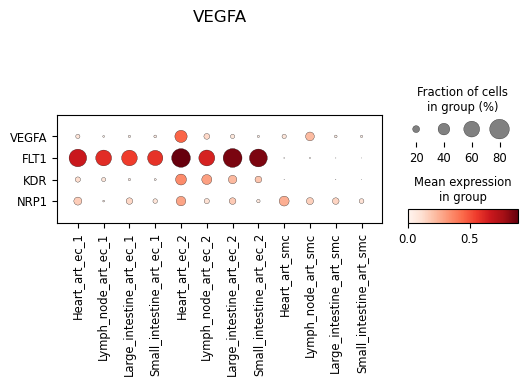

In [10]:
sc.pl.dotplot(adata, ['VEGFA', 'FLT1', 'KDR', 'NRP1'], groupby='Organ_celltype', 
              swap_axes=True, title="VEGFA", log=True)

/nfs/team205/ac65/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


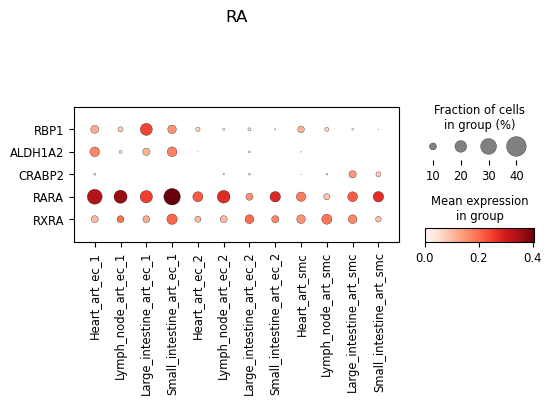

In [93]:
sc.pl.dotplot(adata, ['RBP1',
    'ALDH1A2','CRABP2', 'RARA', 'RXRA'], groupby='Organ_celltype', 
              swap_axes=True, title="RA", log=True)

/nfs/team205/ac65/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


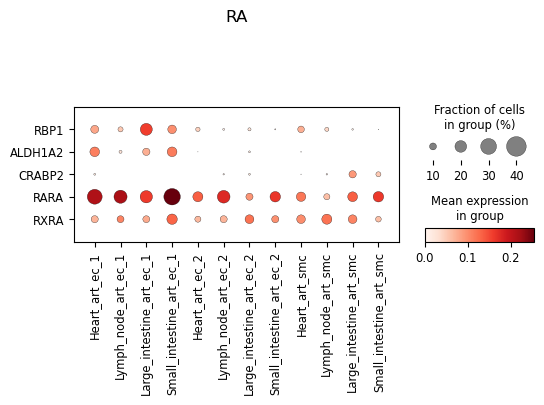

In [11]:
sc.pl.dotplot(adata, ['RBP1',
    'ALDH1A2','CRABP2', 'RARA', 'RXRA'], groupby='Organ_celltype', 
              swap_axes=True, title="RA", log=True)

# androgen and testosterone, beta-nerve growth factor

In [48]:
import numpy as np
import pandas as pd
adata = sc.read_h5ad('/nfs/team205/ac65/vasculature/after_annotation/annotated_objects/cpdb_in_stat/adata_for_cpdb_log1p.h5ad')

In [49]:
np.unique(adata.obs['ann_final_2'])

array(['adip_cap_ec', 'aerocyte_ec', 'aorta_coronary_ec',
       'aorta_coronary_smc', 'art_ec_1', 'art_ec_2', 'art_smc',
       'blood_brain_barrier_ec', 'brain_art_ec', 'brain_art_smc',
       'brain_ven_ec', 'cap_ec', 'cap_pc', 'endocardial_ec',
       'endometrium_cap_ec', 'glomeruli_ec', 'kidney_art_ec',
       'kidney_cap_ec', 'myo_cap_ec', 'pericentral_cap_ec',
       'periportal_cap_ec', 'pul_art_ec', 'pul_cap_ec', 'pul_pc',
       'pul_smc', 'pul_tip_cap_ec', 'pul_ven_ec', 'smc_pc_intermediate',
       'spleen_art_ec', 'uterine_pc', 'uterine_smc', 'ven_ec_1',
       'ven_ec_2', 'ven_smc'], dtype=object)

In [50]:
adata = adata[adata.obs['ann_final_2'].isin(['art_ec_1', 'art_ec_2', 'art_smc', 'pul_art_ec', 'pul_smc', 'brain_art_ec', 'brain_art_smc'])]

In [51]:
np.unique(adata.obs['organ_uni'])

array(['adipose_tissue', 'bladder', 'brain', 'heart', 'kidney',
       'large_intestine', 'large_vessels', 'lung', 'lymph_node', 'muscle',
       'oesophagus', 'pancreas', 'small_intestine', 'spleen', 'thymus',
       'trachea', 'uterus'], dtype=object)

In [52]:
adata = adata[adata.obs['organ_uni'].isin(['adipose_tissue', 'heart',
       'large_intestine', 'lung', 'lymph_node',
       'muscle',  'small_intestine', 'brain'])]

In [53]:
adata

View of AnnData object with n_obs × n_vars = 13364 × 30021
    obs: 'organ_uni', 'donor', 'kit', 'sorting', 'location', 'age', 'gender', 'dissociation', 'ann_ec_states', 'ann_mural_final', 'ann_final', 'ann_final_2', 'Organ', 'Organ_celltype', 'celltype'
    var: 'mt', 'rb', 'n_cells', 'gene_ids-0', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'highly_variable-0', 'highly_variable_rank-0', 'means-0', 'variances-0', 'variances_norm-0', 'highly_variable_nbatches-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'ENSG_id-1', 'gene_name_33538-1', 'gene_name_33694-1', 'gene_names_hg_v1.2-0-0-1', 'highly_variable-1', 'highly_variable_rank-1', 'means-1', 'variances-1', 'variances_norm-1', 'highly_variable_nbatches-1'
    uns: 'log1p'

In [54]:
np.unique(adata.obs['Organ_celltype'])

array(['Adipose_tissue_art_ec_2', 'Adipose_tissue_art_smc',
       'Brain_art_smc', 'Brain_brain_art_ec', 'Brain_brain_art_smc',
       'Heart_art_ec_1', 'Heart_art_ec_2', 'Heart_art_smc',
       'Heart_brain_art_smc', 'Large_intestine_art_ec_1',
       'Large_intestine_art_ec_2', 'Large_intestine_art_smc',
       'Lung_art_smc', 'Lung_brain_art_smc', 'Lung_pul_art_ec',
       'Lung_pul_smc', 'Lymph_node_art_ec_1', 'Lymph_node_art_ec_2',
       'Lymph_node_art_smc', 'Muscle_art_ec_1', 'Muscle_art_ec_2',
       'Muscle_art_smc', 'Small_intestine_art_ec_1',
       'Small_intestine_art_ec_2', 'Small_intestine_art_smc'],
      dtype=object)

In [56]:
# Define the desired order of categories
desired_order = ['Heart_art_ec_1','Large_intestine_art_ec_1', 'Small_intestine_art_ec_1', 'Lymph_node_art_ec_1',
                'Heart_art_ec_2',  'Large_intestine_art_ec_2',  'Small_intestine_art_ec_2',  'Lymph_node_art_ec_2',
                 'Adipose_tissue_art_ec_2', 'Muscle_art_ec_2', 'Lung_pul_art_ec', 'Brain_brain_art_ec', 
                'Heart_art_smc', 'Large_intestine_art_smc', 'Small_intestine_art_smc', 'Lymph_node_art_smc', 
                 'Adipose_tissue_art_smc', 'Muscle_art_smc', 'Lung_pul_smc', 'Brain_brain_art_smc']  # Replace with your desired category order

# Convert 'Organ_celltype' to a Categorical with the desired order
adata.obs['Organ_celltype'] = pd.Categorical(adata.obs['Organ_celltype'], categories=desired_order, ordered=True)

# Now, the 'Organ_celltype' categories are reordered as per your desired


/tmp/ipykernel_4107400/3358675955.py:9: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Organ_celltype'] = pd.Categorical(adata.obs['Organ_celltype'], categories=desired_order, ordered=True)


/nfs/team205/ac65/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


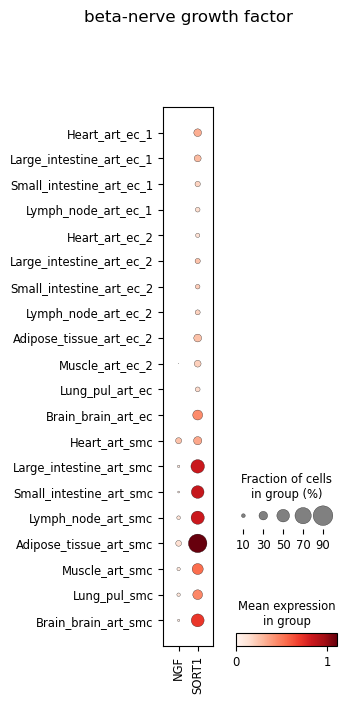

In [57]:
sc.pl.dotplot(adata, ['NGF', 'SORT1'], groupby='Organ_celltype',  title="beta-nerve growth factor")

# cap - pc 

In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
adata = sc.read_h5ad('/nfs/team205/ac65/vasculature/after_annotation/annotated_objects/cpdb_in_stat/adata_for_cpdb_log1p.h5ad')

In [3]:
np.unique(adata.obs.Organ_celltype)

array(['Adipose_tissue_adip_cap_ec', 'Adipose_tissue_art_ec_2',
       'Adipose_tissue_art_smc', 'Adipose_tissue_cap_pc',
       'Adipose_tissue_myo_cap_ec', 'Adipose_tissue_ven_ec_2',
       'Bladder_art_smc', 'Bladder_cap_ec', 'Bladder_smc_pc_intermediate',
       'Bladder_uterine_pc', 'Brain_art_smc',
       'Brain_blood_brain_barrier_ec', 'Brain_brain_art_ec',
       'Brain_brain_art_smc', 'Brain_brain_ven_ec',
       'Brain_smc_pc_intermediate', 'Decidua_endometrium_cap_ec',
       'Decidua_uterine_pc', 'Heart_art_ec_1', 'Heart_art_ec_2',
       'Heart_art_smc', 'Heart_brain_art_smc', 'Heart_cap_pc',
       'Heart_endocardial_ec', 'Heart_myo_cap_ec', 'Heart_pul_ven_ec',
       'Heart_smc_pc_intermediate', 'Heart_ven_ec_1', 'Kidney_art_ec_2',
       'Kidney_art_smc', 'Kidney_glomeruli_ec', 'Kidney_kidney_art_ec',
       'Kidney_kidney_cap_ec', 'Large_intestine_art_ec_1',
       'Large_intestine_art_ec_2', 'Large_intestine_art_smc',
       'Large_intestine_cap_ec', 'Large_intestine_

In [4]:
adata = adata[adata.obs['Organ_celltype'].isin(['Heart_myo_cap_ec', 'Lung_pul_cap_ec', 'Heart_cap_pc', 
                                               'Muscle_myo_cap_ec', 'Pancreas_cap_ec', 'Muscle_cap_pc', 
                                               'Uterus_uterine_pc', 'Uterus_endometrium_cap_ec', 'Lung_pul_cap_ec', 
                                               'Lung_pul_pc', 'Lung_pul_tip_cap_ec', 'Pancreas_cap_pc', 
                                                'Decidua_endometrium_cap_ec', 'Decidua_uterine_pc', 'Thymus_adip_cap_ec',
                                                'Thymus_cap_pc', 'Adipose_tissue_adip_cap_ec', 'Adipose_tissue_cap_pc',
                                                'Lymph_node_adip_cap_ec', 'Lymph_node_cap_pc'
                                               ])]

In [5]:
import numpy as np
np.unique(adata.obs['Organ_celltype'])

array(['Adipose_tissue_adip_cap_ec', 'Adipose_tissue_cap_pc',
       'Decidua_endometrium_cap_ec', 'Decidua_uterine_pc', 'Heart_cap_pc',
       'Heart_myo_cap_ec', 'Lung_pul_cap_ec', 'Lung_pul_pc',
       'Lung_pul_tip_cap_ec', 'Lymph_node_adip_cap_ec',
       'Lymph_node_cap_pc', 'Muscle_cap_pc', 'Muscle_myo_cap_ec',
       'Pancreas_cap_ec', 'Pancreas_cap_pc', 'Thymus_adip_cap_ec',
       'Thymus_cap_pc', 'Uterus_endometrium_cap_ec', 'Uterus_uterine_pc'],
      dtype=object)

In [6]:
import pandas as pd
# Define the desired order of categories
desired_order = ['Heart_myo_cap_ec', 'Muscle_myo_cap_ec','Uterus_endometrium_cap_ec', 'Decidua_endometrium_cap_ec',
                 'Lung_pul_cap_ec', 'Lung_pul_tip_cap_ec', 'Adipose_tissue_adip_cap_ec', 'Thymus_adip_cap_ec', 'Lymph_node_adip_cap_ec', 
                 'Pancreas_cap_ec', 
                 
                'Heart_cap_pc', 'Muscle_cap_pc', 'Uterus_uterine_pc', 'Decidua_uterine_pc', 'Lung_pul_pc', 'Adipose_tissue_cap_pc', 'Thymus_cap_pc',
                 'Lymph_node_cap_pc',  'Pancreas_cap_pc']  # Replace with your desired category order

# Convert 'Organ_celltype' to a Categorical with the desired order
adata.obs['Organ_celltype'] = pd.Categorical(adata.obs['Organ_celltype'], categories=desired_order, ordered=True)

# Now, the 'Organ_celltype' categories are reordered as per your desired


/tmp/ipykernel_2087274/1383089926.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Organ_celltype'] = pd.Categorical(adata.obs['Organ_celltype'], categories=desired_order, ordered=True)


/nfs/team205/ac65/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


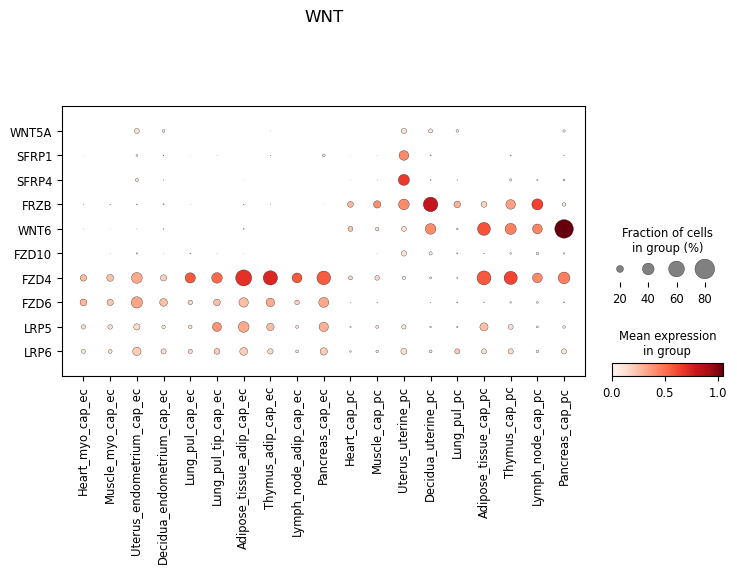

In [18]:
sc.pl.dotplot(adata, ['WNT5A', 'SFRP1', 'SFRP4', 'FRZB', 'WNT6', 'FZD10', 'FZD4', 'FZD6', 'LRP5', 'LRP6'], groupby='Organ_celltype', 
                  swap_axes=True, title="WNT")

/nfs/team205/ac65/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


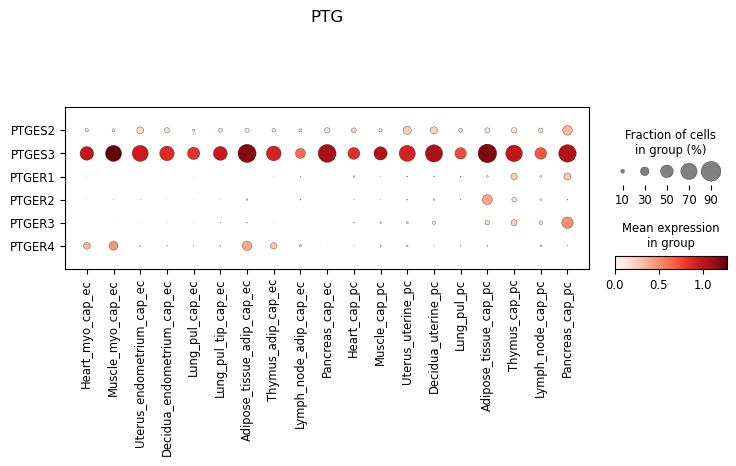

In [64]:
sc.pl.dotplot(adata, ['PTGES2', 'PTGES3','PTGER1', 'PTGER2', 'PTGER3', 'PTGER4'], groupby='Organ_celltype', 
                  swap_axes=True, title="PTG")

/nfs/team205/ac65/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


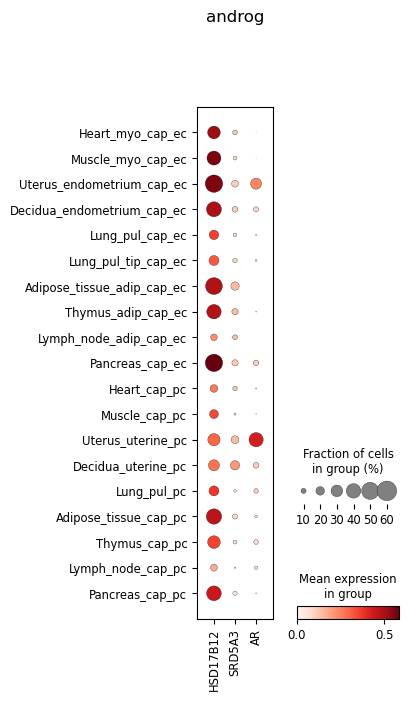

In [66]:
sc.pl.dotplot(adata, ['HSD17B12', 'SRD5A3', 'AR'], groupby='Organ_celltype', 
                   title="androg")

# ven_ec-smc

In [75]:
import numpy as np
import pandas as pd
adata = sc.read_h5ad('/nfs/team205/ac65/vasculature/after_annotation/annotated_objects/cpdb_in_stat/adata_for_cpdb_log1p.h5ad')

In [76]:
np.unique(adata.obs.Organ_celltype)

array(['Adipose_tissue_adip_cap_ec', 'Adipose_tissue_art_ec_2',
       'Adipose_tissue_art_smc', 'Adipose_tissue_cap_pc',
       'Adipose_tissue_myo_cap_ec', 'Adipose_tissue_ven_ec_2',
       'Bladder_art_smc', 'Bladder_cap_ec', 'Bladder_smc_pc_intermediate',
       'Bladder_uterine_pc', 'Brain_art_smc',
       'Brain_blood_brain_barrier_ec', 'Brain_brain_art_ec',
       'Brain_brain_art_smc', 'Brain_brain_ven_ec',
       'Brain_smc_pc_intermediate', 'Decidua_endometrium_cap_ec',
       'Decidua_uterine_pc', 'Heart_art_ec_1', 'Heart_art_ec_2',
       'Heart_art_smc', 'Heart_brain_art_smc', 'Heart_cap_pc',
       'Heart_endocardial_ec', 'Heart_myo_cap_ec', 'Heart_pul_ven_ec',
       'Heart_smc_pc_intermediate', 'Heart_ven_ec_1', 'Kidney_art_ec_2',
       'Kidney_art_smc', 'Kidney_glomeruli_ec', 'Kidney_kidney_art_ec',
       'Kidney_kidney_cap_ec', 'Large_intestine_art_ec_1',
       'Large_intestine_art_ec_2', 'Large_intestine_art_smc',
       'Large_intestine_cap_ec', 'Large_intestine_

In [77]:
adata = adata[adata.obs['Organ_celltype'].isin(['Heart_ven_ec_1', 'Uterus_ven_ec_1', 'Lung_ven_ec_1', 
                                                'Heart_smc_pc_intermediate', 'Uterus_smc_pc_intermediate', 'Lung_smc_pc_intermediate'])]

In [78]:
adata.obs['Organ_celltype']

CGATCGGGTGCCTGTG_HCAHeart7728607-0-0                                Heart_ven_ec_1
GCACTCTAGAAGAAGC_HCAHeart7728607-0-0                                Heart_ven_ec_1
GGCAATTTCTCGCATC_HCAHeart7728607-0-0                                Heart_ven_ec_1
CGTTCTGCAAGAAGAG_HCAHeart7728607-0-0                                Heart_ven_ec_1
TTGAACGCAGTGGGAT_HCAHeart7728607-0-0                                Heart_ven_ec_1
                                                                   ...            
GTCCACTTCCTACCGT_TSP4_Uterus_Myometrium_10X_1_1-34-1    Uterus_smc_pc_intermediate
AGAGAGCCATCAGCAT_TSP4_Uterus_Myometrium_10X_1_1-34-1    Uterus_smc_pc_intermediate
TGGTACAGTCAAGGCA_TSP4_Uterus_Myometrium_10X_1_1-34-1    Uterus_smc_pc_intermediate
CCAATTTGTATCTCTT_TSP4_Uterus_Myometrium_10X_1_1-34-1    Uterus_smc_pc_intermediate
ACTTAGGCACTATCCC_TSP4_Uterus_Myometrium_10X_1_1-34-1    Uterus_smc_pc_intermediate
Name: Organ_celltype, Length: 429, dtype: category
Categories (6, object): ['Heart_smc_

In [79]:
import pandas as pd
# Define the desired order of categories
desired_order = ['Heart_ven_ec_1', 'Uterus_ven_ec_1', 'Lung_ven_ec_1', 
                 'Heart_smc_pc_intermediate', 'Uterus_smc_pc_intermediate', 'Lung_smc_pc_intermediate']  # Replace with your desired category order

# Convert 'Organ_celltype' to a Categorical with the desired order
adata.obs['Organ_celltype'] = pd.Categorical(adata.obs['Organ_celltype'], categories=desired_order, ordered=True)

# Now, the 'Organ_celltype' categories are reordered as per your desired


/tmp/ipykernel_4107400/3104279088.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Organ_celltype'] = pd.Categorical(adata.obs['Organ_celltype'], categories=desired_order, ordered=True)


/nfs/team205/ac65/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


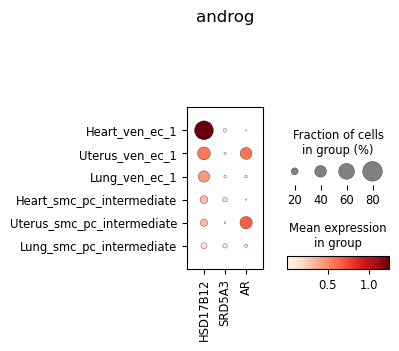

In [80]:
sc.pl.dotplot(adata, ['HSD17B12', 'SRD5A3', 'AR'], groupby='Organ_celltype', 
                   title="androg")

# modify scale range

# ec-smc 

In [81]:
import scanpy as sc
import os
sc.set_figure_params(dpi=300)

In [82]:
import numpy as np
import pandas as pd
adata = sc.read_h5ad('/nfs/team205/ac65/vasculature/after_annotation/annotated_objects/cpdb_in_stat/adata_for_cpdb_log1p.h5ad')

In [83]:
adata

AnnData object with n_obs × n_vars = 56176 × 30021
    obs: 'organ_uni', 'donor', 'kit', 'sorting', 'location', 'age', 'gender', 'dissociation', 'ann_ec_states', 'ann_mural_final', 'ann_final', 'ann_final_2', 'Organ', 'Organ_celltype', 'celltype'
    var: 'mt', 'rb', 'n_cells', 'gene_ids-0', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'highly_variable-0', 'highly_variable_rank-0', 'means-0', 'variances-0', 'variances_norm-0', 'highly_variable_nbatches-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'ENSG_id-1', 'gene_name_33538-1', 'gene_name_33694-1', 'gene_names_hg_v1.2-0-0-1', 'highly_variable-1', 'highly_variable_rank-1', 'means-1', 'variances-1', 'variances_norm-1', 'highly_variable_nbatches-1'
    uns: 'log1p'

In [84]:
adata = adata[adata.obs['ann_final_2'].isin(['art_ec_1', 'art_ec_2', 'art_smc'])]

In [85]:
adata = adata[adata.obs['organ_uni'].isin(['heart', 'large_intestine', 'small_intestine', "lymph_node"])]

In [86]:
adata

View of AnnData object with n_obs × n_vars = 3058 × 30021
    obs: 'organ_uni', 'donor', 'kit', 'sorting', 'location', 'age', 'gender', 'dissociation', 'ann_ec_states', 'ann_mural_final', 'ann_final', 'ann_final_2', 'Organ', 'Organ_celltype', 'celltype'
    var: 'mt', 'rb', 'n_cells', 'gene_ids-0', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'highly_variable-0', 'highly_variable_rank-0', 'means-0', 'variances-0', 'variances_norm-0', 'highly_variable_nbatches-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'ENSG_id-1', 'gene_name_33538-1', 'gene_name_33694-1', 'gene_names_hg_v1.2-0-0-1', 'highly_variable-1', 'highly_variable_rank-1', 'means-1', 'variances-1', 'variances_norm-1', 'highly_variable_nbatches-1'
    uns: 'log1p'

In [87]:
np.unique(adata.obs['Organ_celltype'])

array(['Heart_art_ec_1', 'Heart_art_ec_2', 'Heart_art_smc',
       'Large_intestine_art_ec_1', 'Large_intestine_art_ec_2',
       'Large_intestine_art_smc', 'Lymph_node_art_ec_1',
       'Lymph_node_art_ec_2', 'Lymph_node_art_smc',
       'Small_intestine_art_ec_1', 'Small_intestine_art_ec_2',
       'Small_intestine_art_smc'], dtype=object)

In [88]:
# Define the desired order of categories
desired_order = ['Heart_art_ec_1','Lymph_node_art_ec_1', 'Large_intestine_art_ec_1', 'Small_intestine_art_ec_1', 
                'Heart_art_ec_2', 'Lymph_node_art_ec_2', 'Large_intestine_art_ec_2',  'Small_intestine_art_ec_2', 
                'Heart_art_smc','Lymph_node_art_smc','Large_intestine_art_smc', 'Small_intestine_art_smc', ]  # Replace with your desired category order

# Convert 'Organ_celltype' to a Categorical with the desired order
adata.obs['Organ_celltype'] = pd.Categorical(adata.obs['Organ_celltype'], categories=desired_order, ordered=True)

# Now, the 'Organ_celltype' categories are reordered as per your desired


/tmp/ipykernel_2087274/1002756125.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Organ_celltype'] = pd.Categorical(adata.obs['Organ_celltype'], categories=desired_order, ordered=True)


/nfs/team205/ac65/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


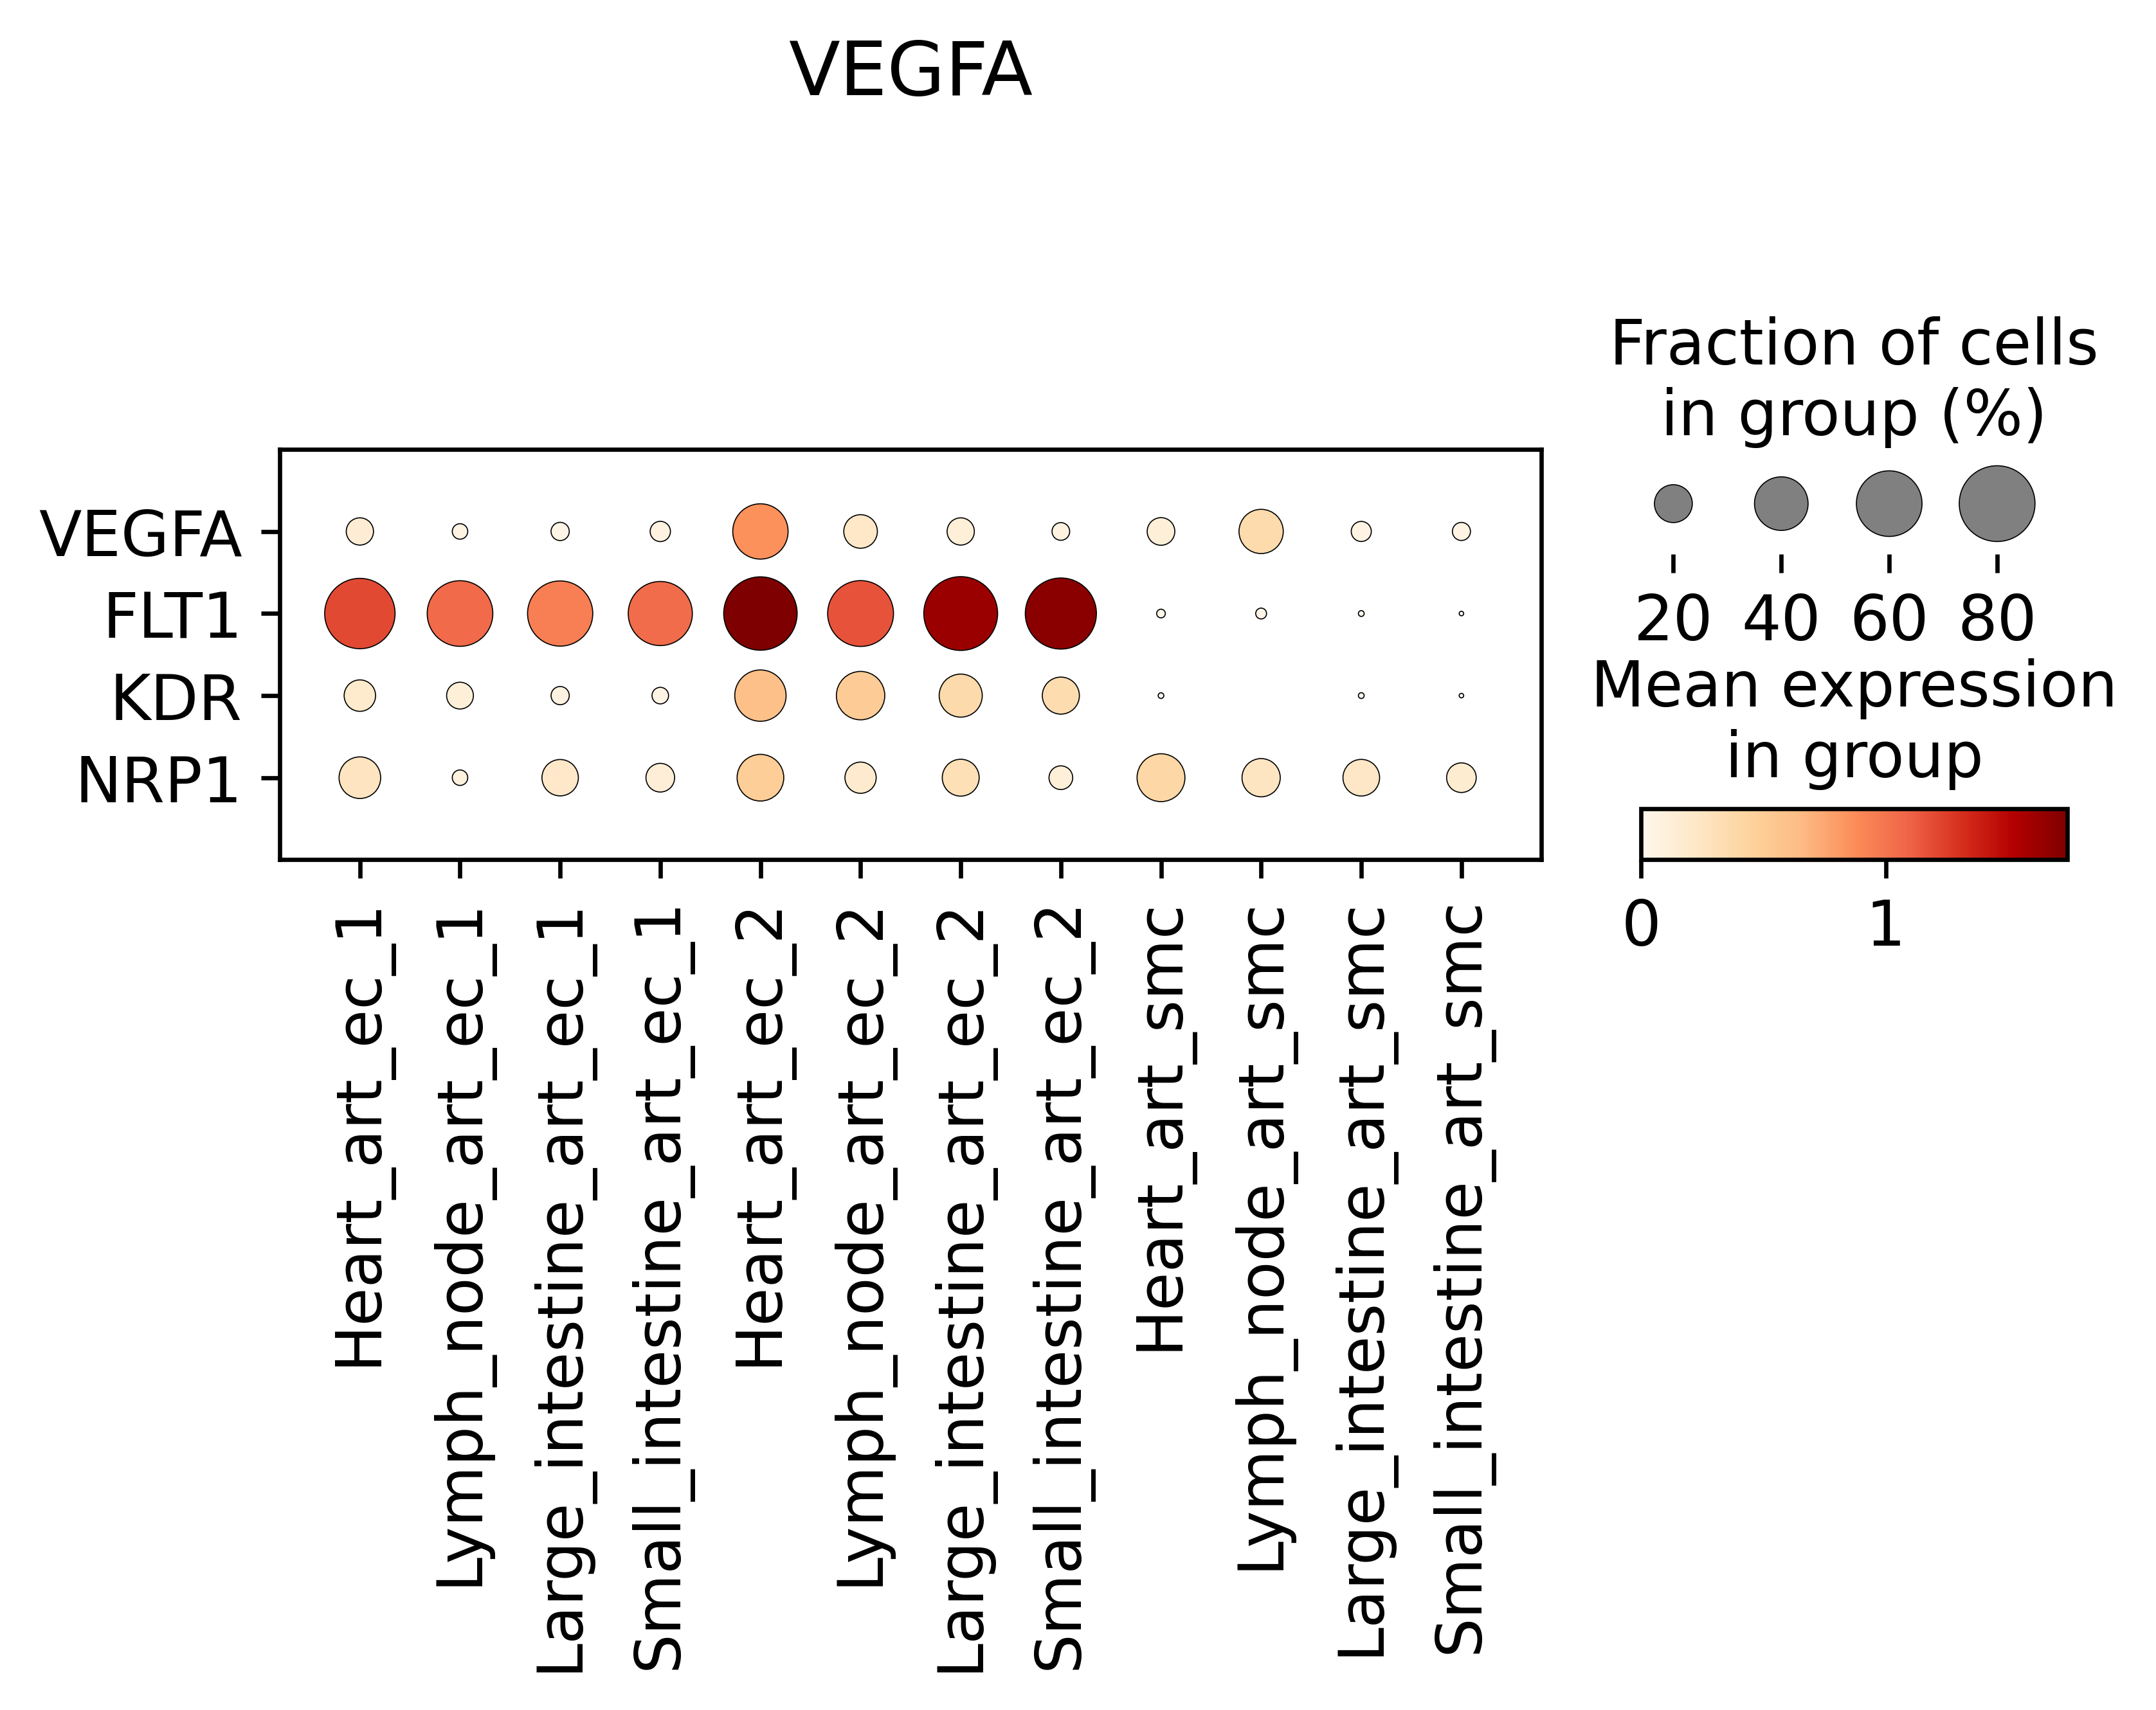

In [124]:
sc.pl.DotPlot(adata, ['VEGFA', 'FLT1', 'KDR', 'NRP1'], groupby='Organ_celltype', title="VEGFA", cmap="OrRd")  \
.style(size_exponent=1).swap_axes().show()

/nfs/team205/ac65/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


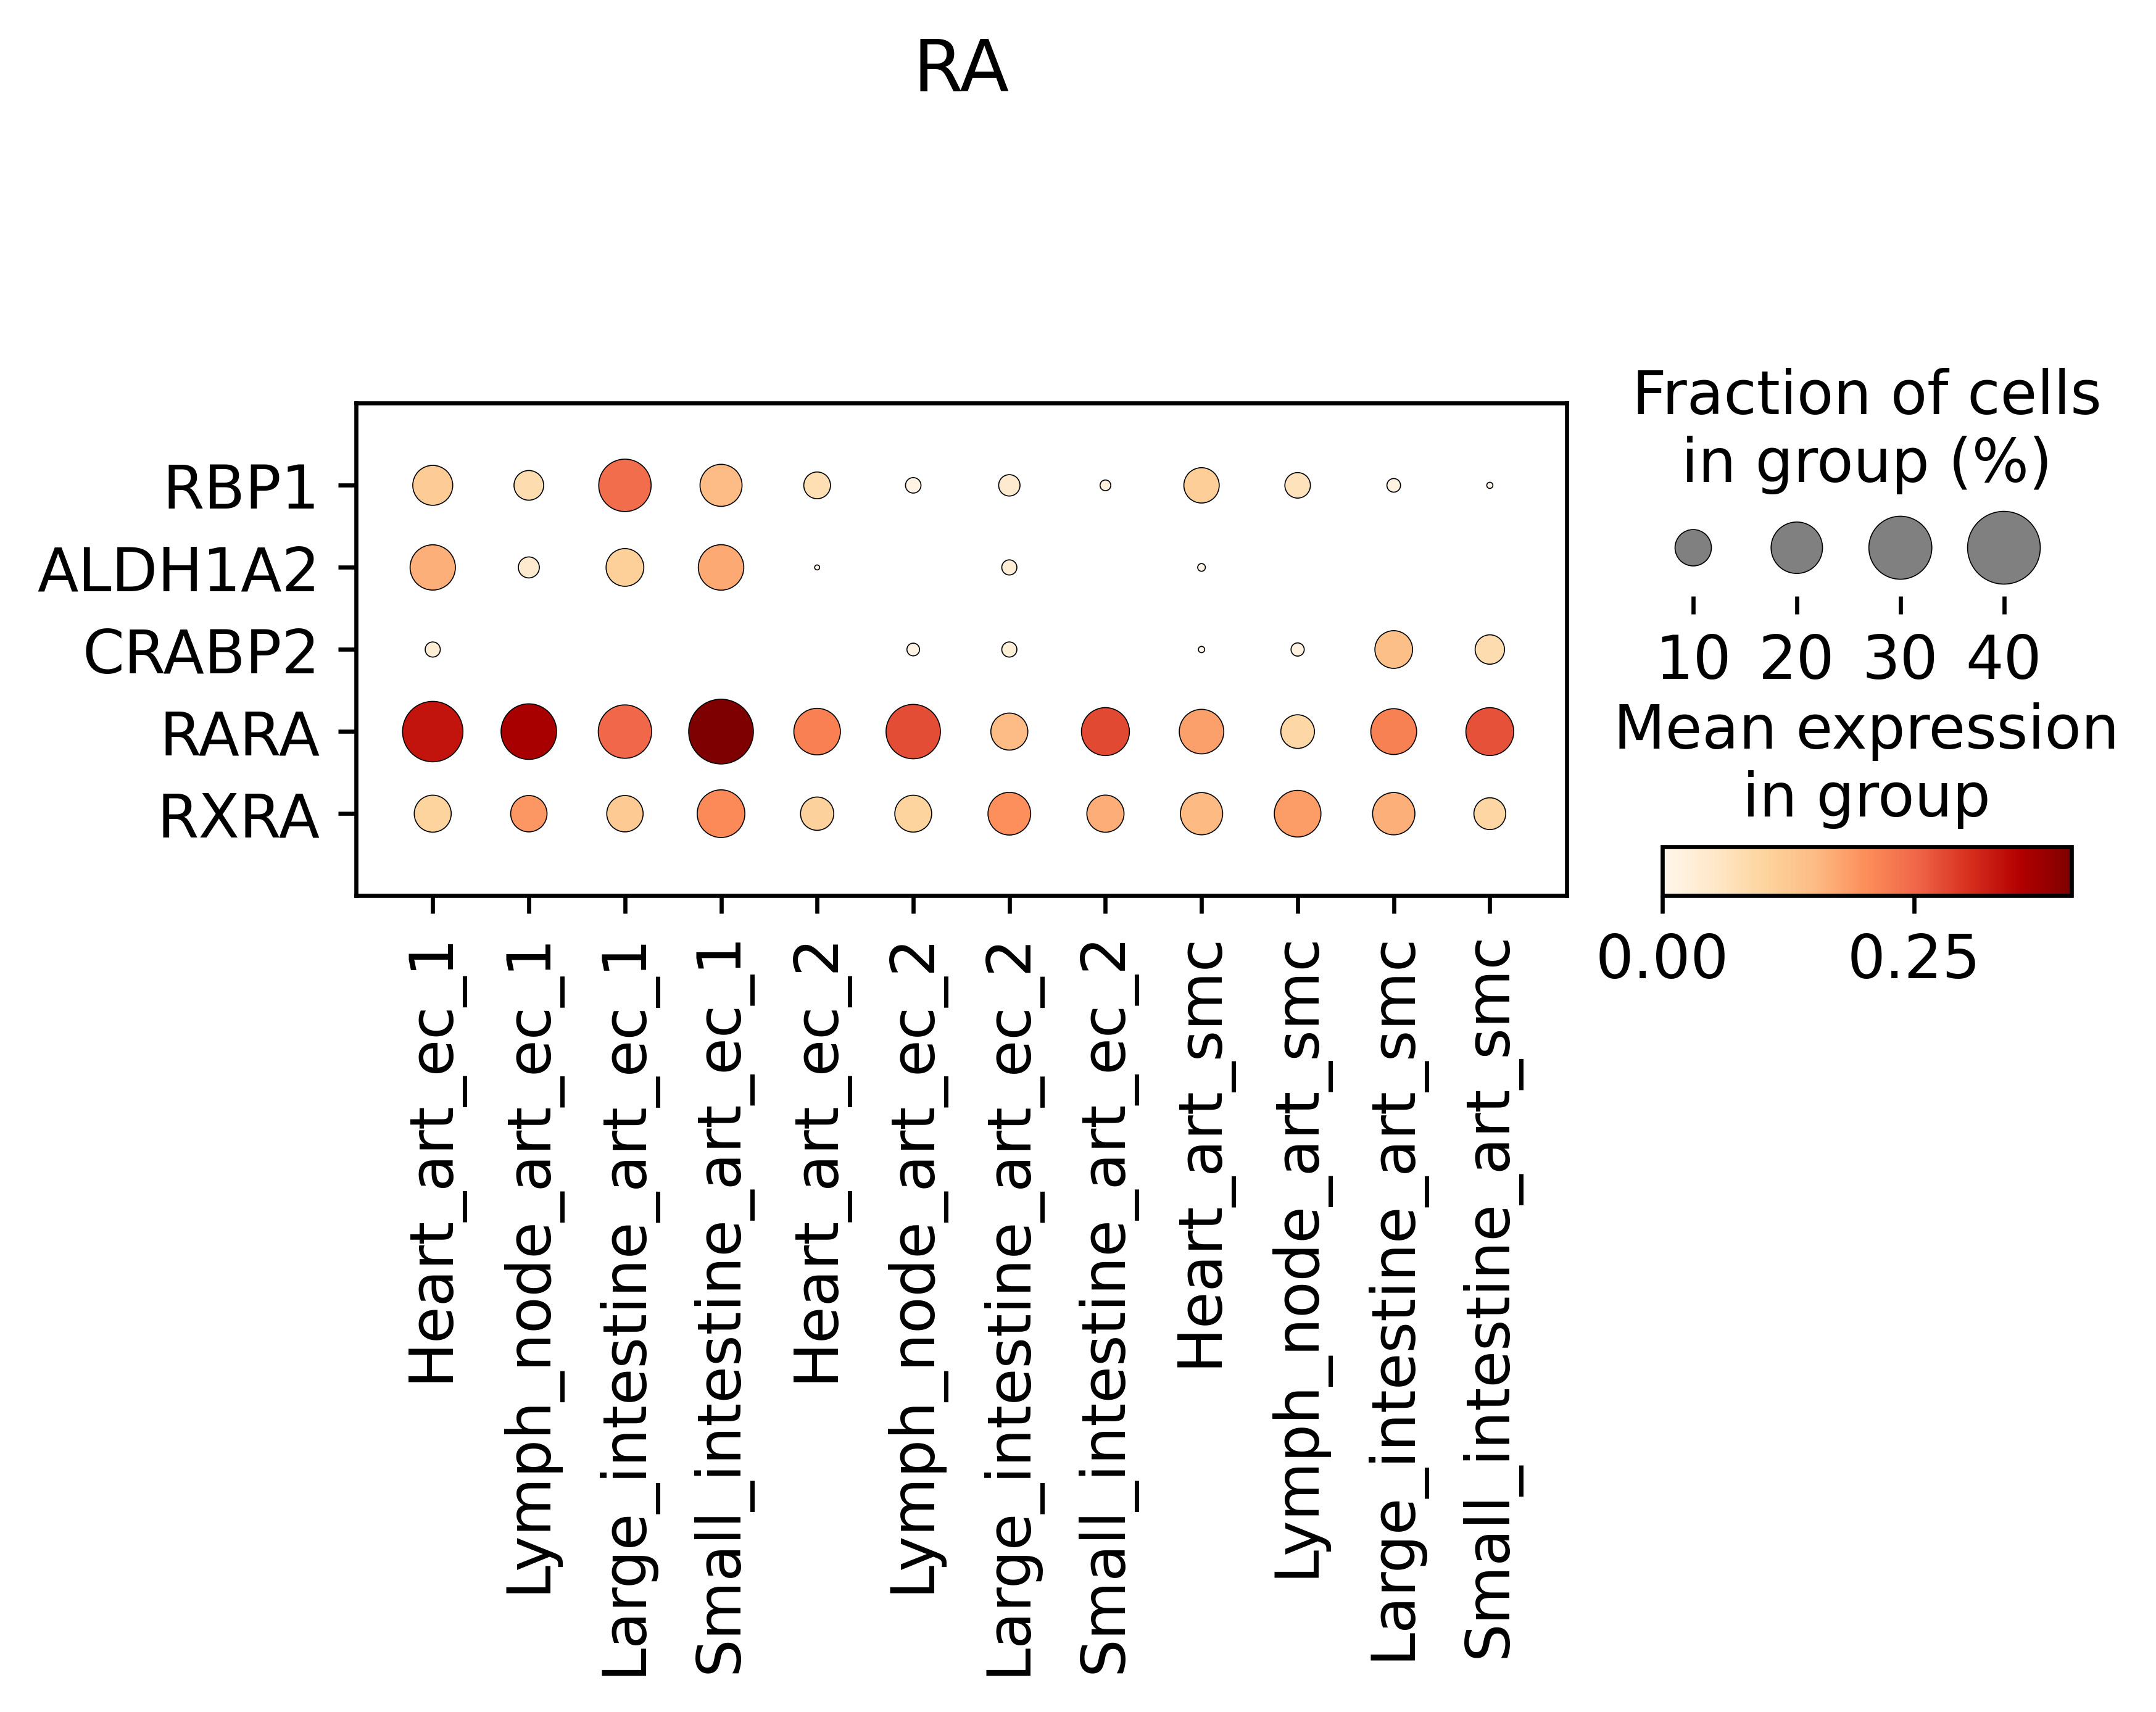

In [90]:
sc.pl.DotPlot(adata, ['RBP1',
    'ALDH1A2','CRABP2', 'RARA', 'RXRA'], groupby='Organ_celltype', title="RA", cmap="OrRd")  \
.style(size_exponent=1).swap_axes().show()

# androgen and testosterone, beta-nerve growth factor

In [91]:
import numpy as np
import pandas as pd
adata = sc.read_h5ad('/nfs/team205/ac65/vasculature/after_annotation/annotated_objects/cpdb_in_stat/adata_for_cpdb_log1p.h5ad')

In [92]:
np.unique(adata.obs['ann_final_2'])

array(['adip_cap_ec', 'aerocyte_ec', 'aorta_coronary_ec',
       'aorta_coronary_smc', 'art_ec_1', 'art_ec_2', 'art_smc',
       'blood_brain_barrier_ec', 'brain_art_ec', 'brain_art_smc',
       'brain_ven_ec', 'cap_ec', 'cap_pc', 'endocardial_ec',
       'endometrium_cap_ec', 'glomeruli_ec', 'kidney_art_ec',
       'kidney_cap_ec', 'myo_cap_ec', 'pericentral_cap_ec',
       'periportal_cap_ec', 'pul_art_ec', 'pul_cap_ec', 'pul_pc',
       'pul_smc', 'pul_tip_cap_ec', 'pul_ven_ec', 'smc_pc_intermediate',
       'spleen_art_ec', 'uterine_pc', 'uterine_smc', 'ven_ec_1',
       'ven_ec_2', 'ven_smc'], dtype=object)

In [93]:
adata = adata[adata.obs['ann_final_2'].isin(['art_ec_1', 'art_ec_2', 'art_smc', 'pul_art_ec', 'pul_smc', 'brain_art_ec', 'brain_art_smc'])]

In [94]:
np.unique(adata.obs['organ_uni'])

array(['adipose_tissue', 'bladder', 'brain', 'heart', 'kidney',
       'large_intestine', 'large_vessels', 'lung', 'lymph_node', 'muscle',
       'oesophagus', 'pancreas', 'small_intestine', 'spleen', 'thymus',
       'trachea', 'uterus'], dtype=object)

In [95]:
adata = adata[adata.obs['organ_uni'].isin(['adipose_tissue', 'heart',
       'large_intestine', 'lung', 'lymph_node',
       'muscle',  'small_intestine', 'brain'])]

In [96]:
adata

View of AnnData object with n_obs × n_vars = 13364 × 30021
    obs: 'organ_uni', 'donor', 'kit', 'sorting', 'location', 'age', 'gender', 'dissociation', 'ann_ec_states', 'ann_mural_final', 'ann_final', 'ann_final_2', 'Organ', 'Organ_celltype', 'celltype'
    var: 'mt', 'rb', 'n_cells', 'gene_ids-0', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'highly_variable-0', 'highly_variable_rank-0', 'means-0', 'variances-0', 'variances_norm-0', 'highly_variable_nbatches-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'ENSG_id-1', 'gene_name_33538-1', 'gene_name_33694-1', 'gene_names_hg_v1.2-0-0-1', 'highly_variable-1', 'highly_variable_rank-1', 'means-1', 'variances-1', 'variances_norm-1', 'highly_variable_nbatches-1'
    uns: 'log1p'

In [97]:
np.unique(adata.obs['Organ_celltype'])

array(['Adipose_tissue_art_ec_2', 'Adipose_tissue_art_smc',
       'Brain_art_smc', 'Brain_brain_art_ec', 'Brain_brain_art_smc',
       'Heart_art_ec_1', 'Heart_art_ec_2', 'Heart_art_smc',
       'Heart_brain_art_smc', 'Large_intestine_art_ec_1',
       'Large_intestine_art_ec_2', 'Large_intestine_art_smc',
       'Lung_art_smc', 'Lung_brain_art_smc', 'Lung_pul_art_ec',
       'Lung_pul_smc', 'Lymph_node_art_ec_1', 'Lymph_node_art_ec_2',
       'Lymph_node_art_smc', 'Muscle_art_ec_1', 'Muscle_art_ec_2',
       'Muscle_art_smc', 'Small_intestine_art_ec_1',
       'Small_intestine_art_ec_2', 'Small_intestine_art_smc'],
      dtype=object)

In [98]:
# Define the desired order of categories
desired_order = ['Heart_art_ec_1','Large_intestine_art_ec_1', 'Small_intestine_art_ec_1', 'Lymph_node_art_ec_1',
                'Heart_art_ec_2',  'Large_intestine_art_ec_2',  'Small_intestine_art_ec_2',  'Lymph_node_art_ec_2',
                 'Adipose_tissue_art_ec_2', 'Muscle_art_ec_2', 'Lung_pul_art_ec', 'Brain_brain_art_ec', 
                'Heart_art_smc', 'Large_intestine_art_smc', 'Small_intestine_art_smc', 'Lymph_node_art_smc', 
                 'Adipose_tissue_art_smc', 'Muscle_art_smc', 'Lung_pul_smc', 'Brain_brain_art_smc']  # Replace with your desired category order

# Convert 'Organ_celltype' to a Categorical with the desired order
adata.obs['Organ_celltype'] = pd.Categorical(adata.obs['Organ_celltype'], categories=desired_order, ordered=True)

# Now, the 'Organ_celltype' categories are reordered as per your desired


/tmp/ipykernel_2087274/3358675955.py:9: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Organ_celltype'] = pd.Categorical(adata.obs['Organ_celltype'], categories=desired_order, ordered=True)


In [99]:
import scanpy as sc

/nfs/team205/ac65/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


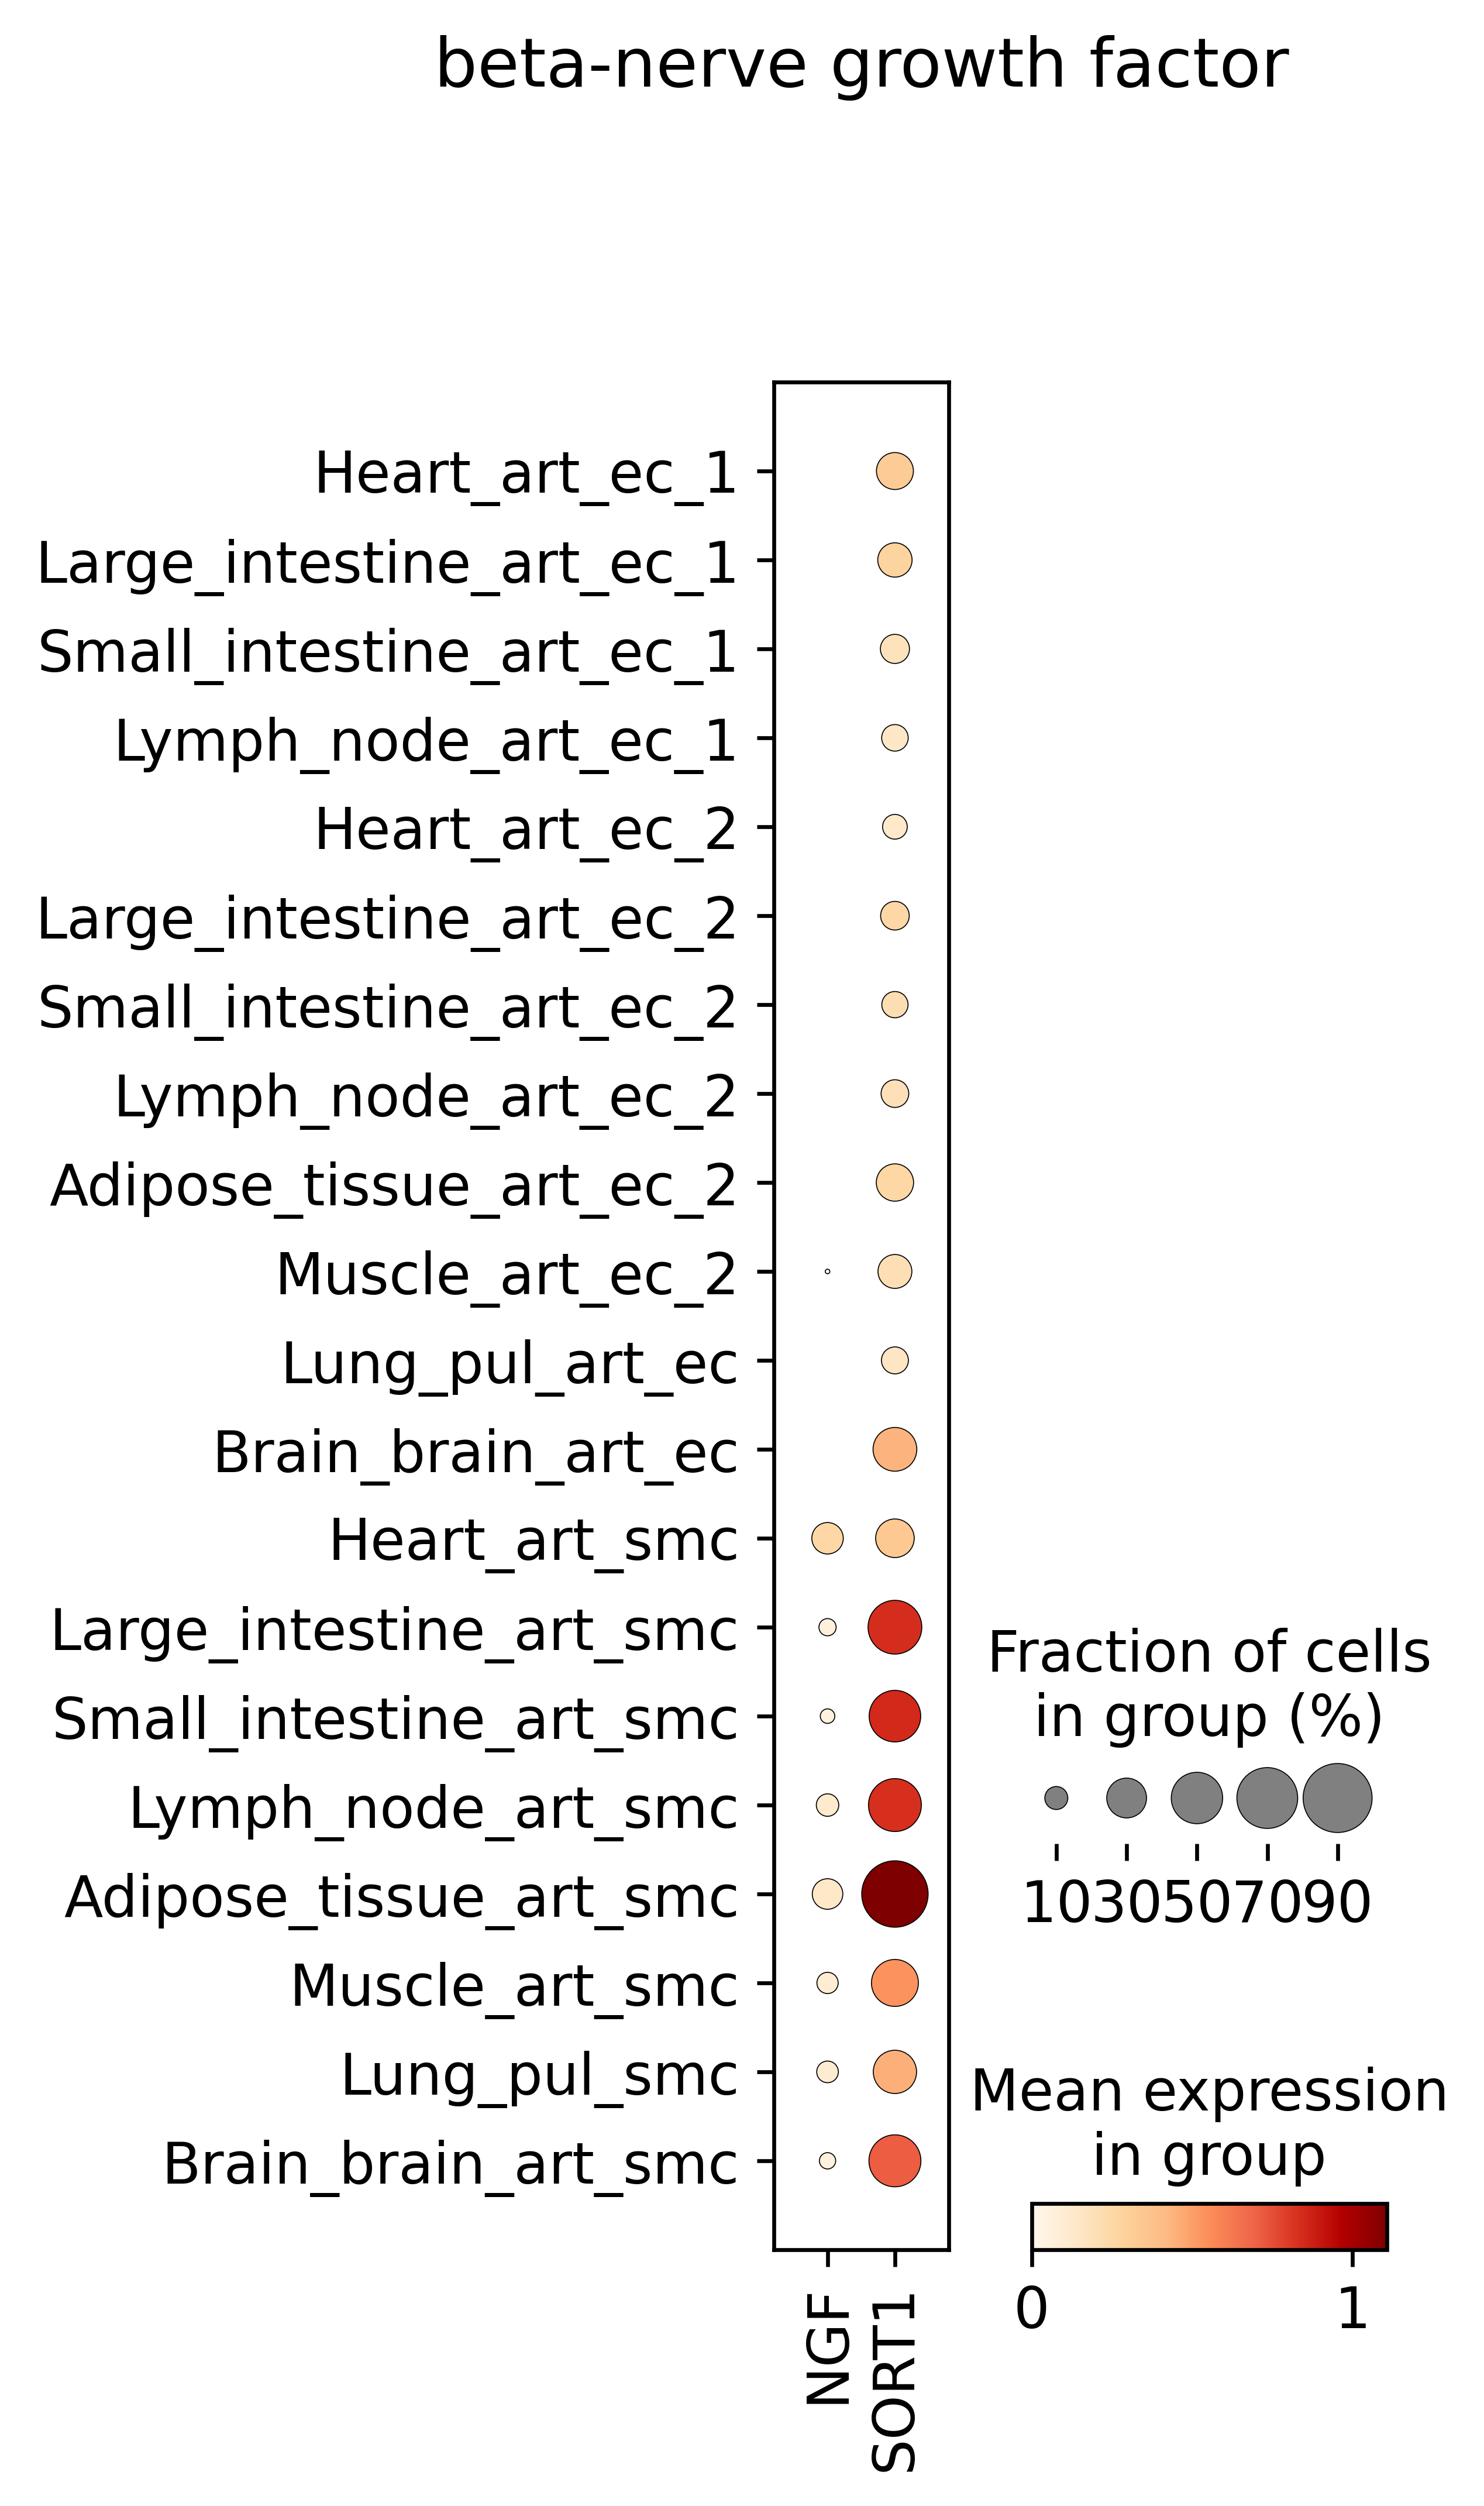

In [100]:
sc.pl.DotPlot(adata, ['NGF', 'SORT1'], groupby='Organ_celltype',  title="beta-nerve growth factor", cmap="OrRd")  \
.style(size_exponent=1).show()

# cap - pc 

In [101]:
import scanpy as sc
import numpy as np
import pandas as pd
adata = sc.read_h5ad('/nfs/team205/ac65/vasculature/after_annotation/annotated_objects/cpdb_in_stat/adata_for_cpdb_log1p.h5ad')

In [102]:
np.unique(adata.obs.Organ_celltype)

array(['Adipose_tissue_adip_cap_ec', 'Adipose_tissue_art_ec_2',
       'Adipose_tissue_art_smc', 'Adipose_tissue_cap_pc',
       'Adipose_tissue_myo_cap_ec', 'Adipose_tissue_ven_ec_2',
       'Bladder_art_smc', 'Bladder_cap_ec', 'Bladder_smc_pc_intermediate',
       'Bladder_uterine_pc', 'Brain_art_smc',
       'Brain_blood_brain_barrier_ec', 'Brain_brain_art_ec',
       'Brain_brain_art_smc', 'Brain_brain_ven_ec',
       'Brain_smc_pc_intermediate', 'Decidua_endometrium_cap_ec',
       'Decidua_uterine_pc', 'Heart_art_ec_1', 'Heart_art_ec_2',
       'Heart_art_smc', 'Heart_brain_art_smc', 'Heart_cap_pc',
       'Heart_endocardial_ec', 'Heart_myo_cap_ec', 'Heart_pul_ven_ec',
       'Heart_smc_pc_intermediate', 'Heart_ven_ec_1', 'Kidney_art_ec_2',
       'Kidney_art_smc', 'Kidney_glomeruli_ec', 'Kidney_kidney_art_ec',
       'Kidney_kidney_cap_ec', 'Large_intestine_art_ec_1',
       'Large_intestine_art_ec_2', 'Large_intestine_art_smc',
       'Large_intestine_cap_ec', 'Large_intestine_

In [103]:
adata = adata[adata.obs['Organ_celltype'].isin(['Heart_myo_cap_ec', 'Lung_pul_cap_ec', 'Heart_cap_pc', 
                                               'Muscle_myo_cap_ec', 'Pancreas_cap_ec', 'Muscle_cap_pc', 
                                               'Uterus_uterine_pc', 'Uterus_endometrium_cap_ec', 'Lung_pul_cap_ec', 
                                               'Lung_pul_pc', 'Lung_pul_tip_cap_ec', 'Pancreas_cap_pc', 
                                                'Decidua_endometrium_cap_ec', 'Decidua_uterine_pc', 'Thymus_adip_cap_ec',
                                                'Thymus_cap_pc', 'Adipose_tissue_adip_cap_ec', 'Adipose_tissue_cap_pc',
                                                'Lymph_node_adip_cap_ec', 'Lymph_node_cap_pc'
                                               ])]

In [104]:
import numpy as np
np.unique(adata.obs['Organ_celltype'])

array(['Adipose_tissue_adip_cap_ec', 'Adipose_tissue_cap_pc',
       'Decidua_endometrium_cap_ec', 'Decidua_uterine_pc', 'Heart_cap_pc',
       'Heart_myo_cap_ec', 'Lung_pul_cap_ec', 'Lung_pul_pc',
       'Lung_pul_tip_cap_ec', 'Lymph_node_adip_cap_ec',
       'Lymph_node_cap_pc', 'Muscle_cap_pc', 'Muscle_myo_cap_ec',
       'Pancreas_cap_ec', 'Pancreas_cap_pc', 'Thymus_adip_cap_ec',
       'Thymus_cap_pc', 'Uterus_endometrium_cap_ec', 'Uterus_uterine_pc'],
      dtype=object)

In [105]:
import pandas as pd
# Define the desired order of categories
desired_order = ['Heart_myo_cap_ec', 'Muscle_myo_cap_ec','Uterus_endometrium_cap_ec', 'Decidua_endometrium_cap_ec',
                 'Lung_pul_cap_ec', 'Lung_pul_tip_cap_ec', 'Adipose_tissue_adip_cap_ec', 'Thymus_adip_cap_ec', 'Lymph_node_adip_cap_ec', 
                 'Pancreas_cap_ec', 
                 
                'Heart_cap_pc', 'Muscle_cap_pc', 'Uterus_uterine_pc', 'Decidua_uterine_pc', 'Lung_pul_pc', 'Adipose_tissue_cap_pc', 'Thymus_cap_pc',
                 'Lymph_node_cap_pc',  'Pancreas_cap_pc']  # Replace with your desired category order

# Convert 'Organ_celltype' to a Categorical with the desired order
adata.obs['Organ_celltype'] = pd.Categorical(adata.obs['Organ_celltype'], categories=desired_order, ordered=True)

# Now, the 'Organ_celltype' categories are reordered as per your desired


/tmp/ipykernel_2087274/1383089926.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Organ_celltype'] = pd.Categorical(adata.obs['Organ_celltype'], categories=desired_order, ordered=True)


/nfs/team205/ac65/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


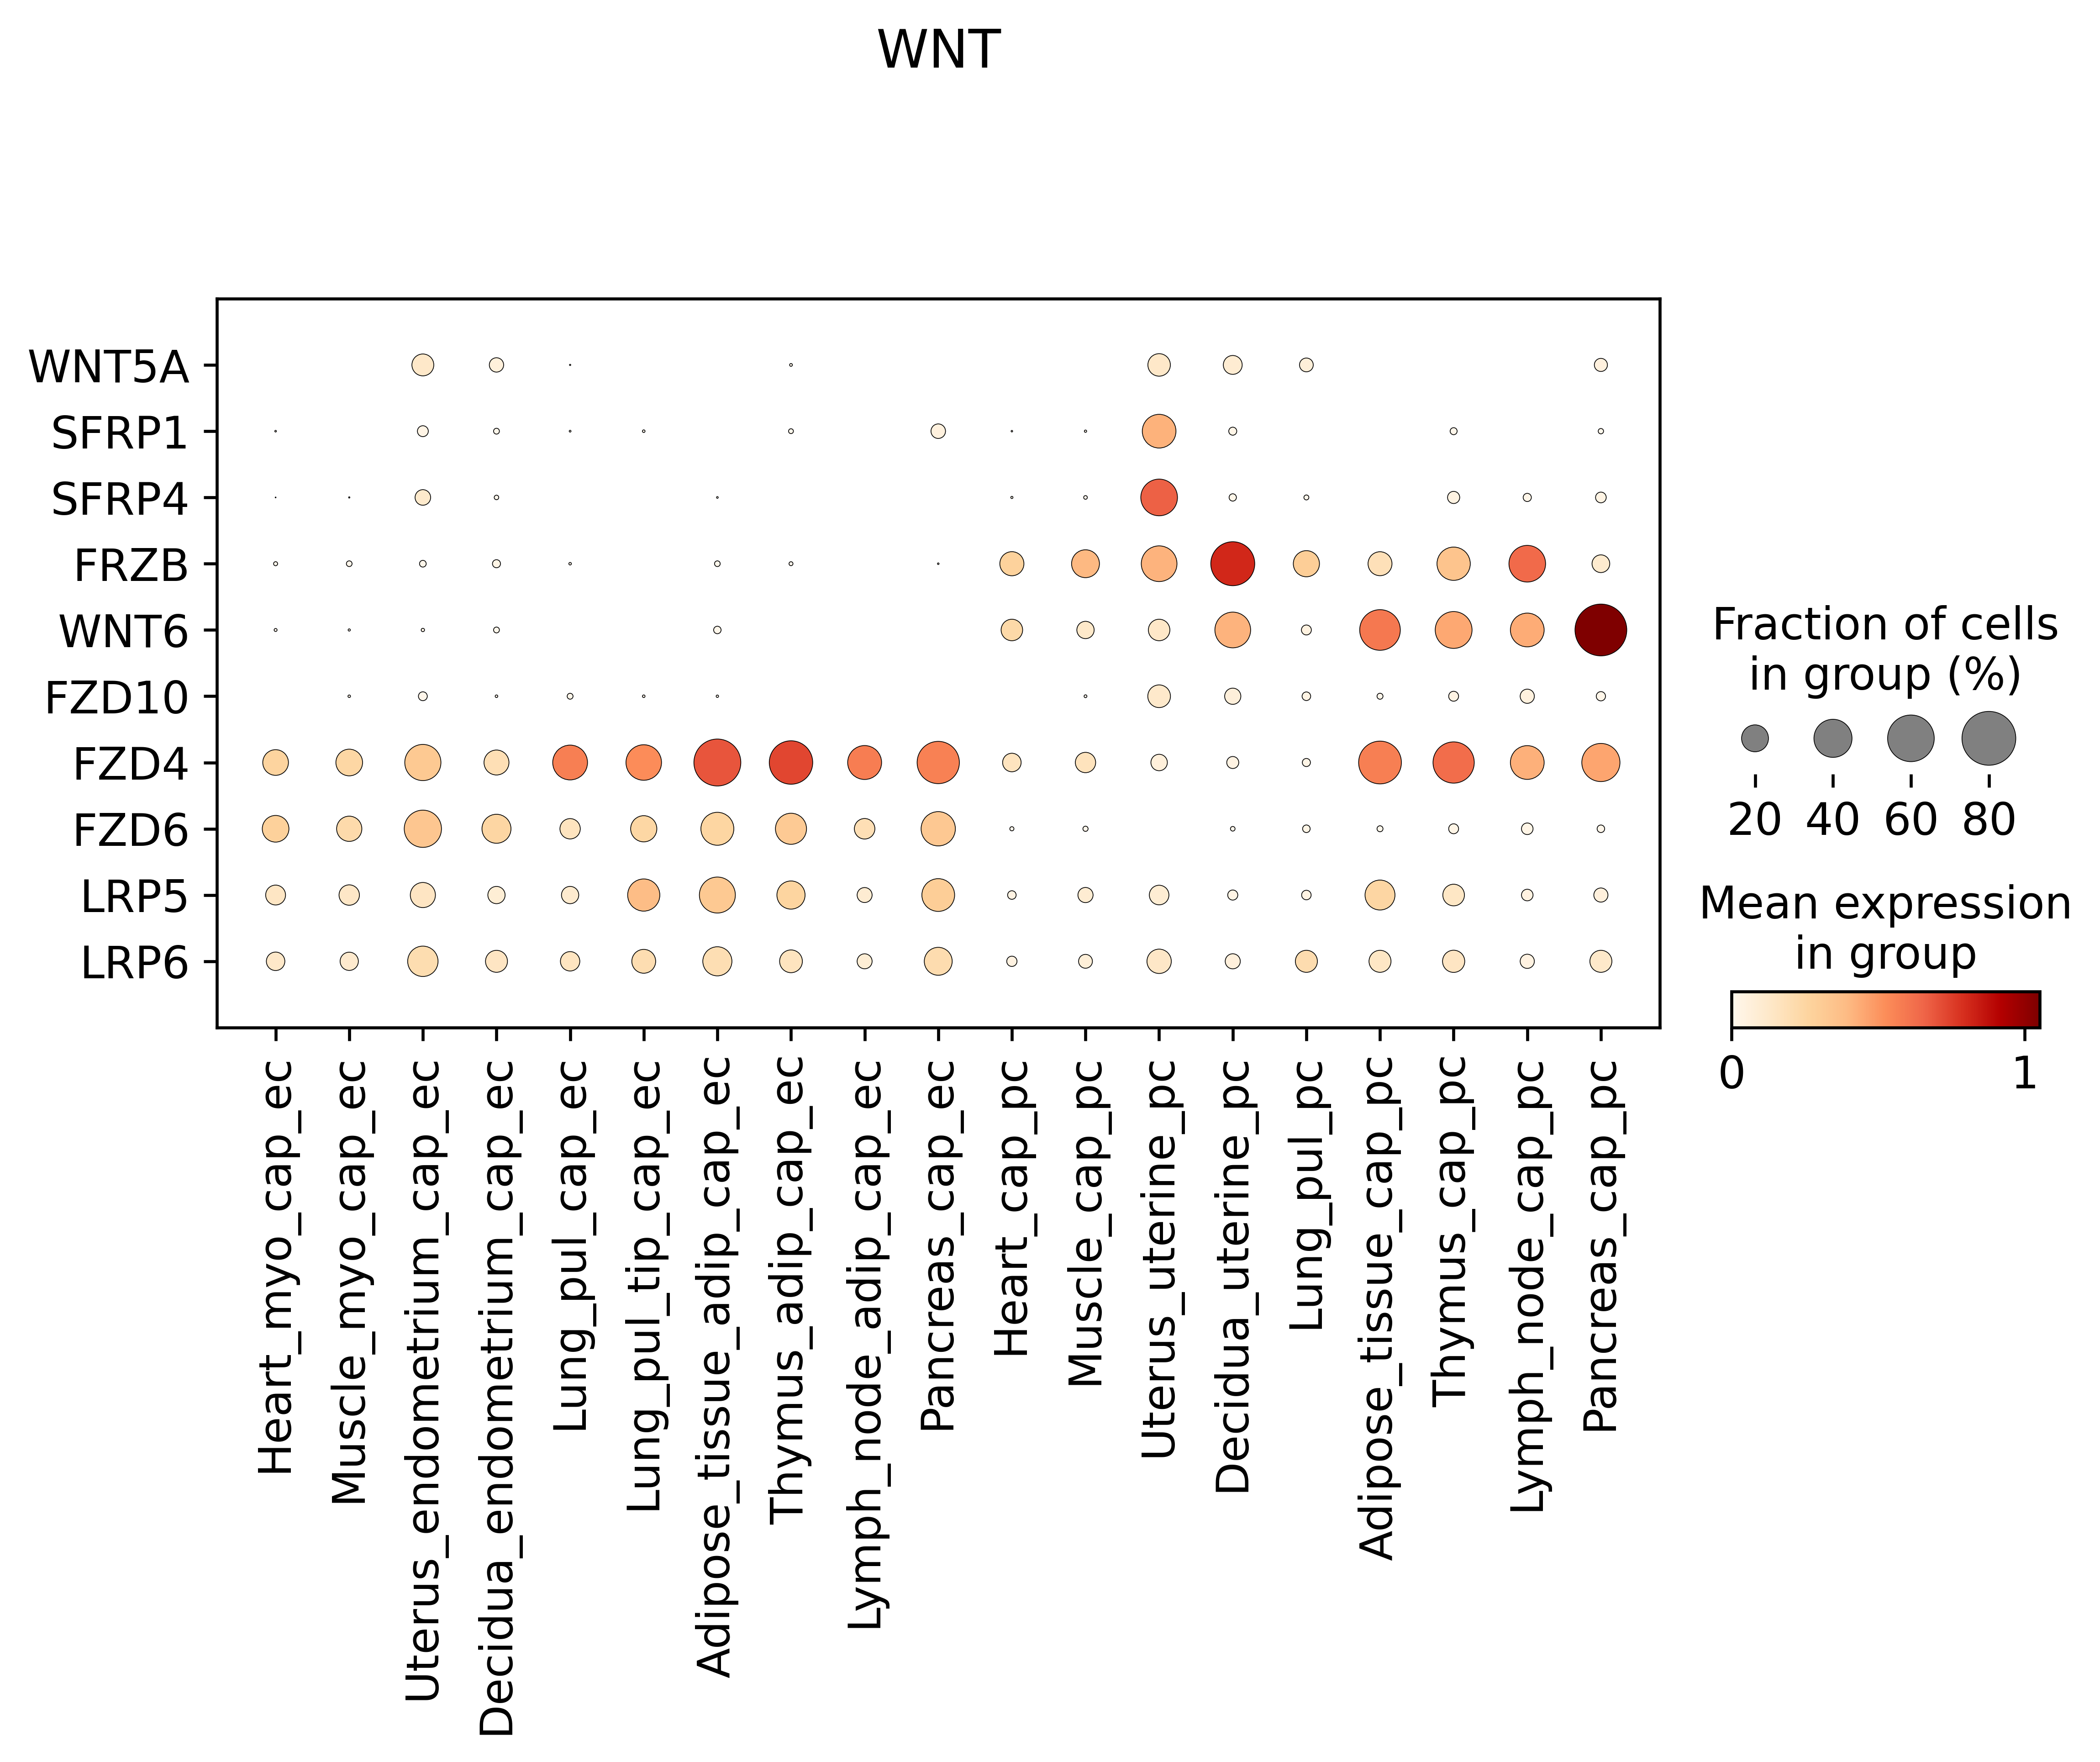

In [106]:
sc.pl.DotPlot(adata, ['WNT5A', 'SFRP1', 'SFRP4', 'FRZB', 'WNT6', 'FZD10', 'FZD4', 'FZD6', 'LRP5', 'LRP6'], groupby='Organ_celltype', title="WNT", cmap="OrRd")  \
.style(size_exponent=1).swap_axes().show()

/nfs/team205/ac65/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


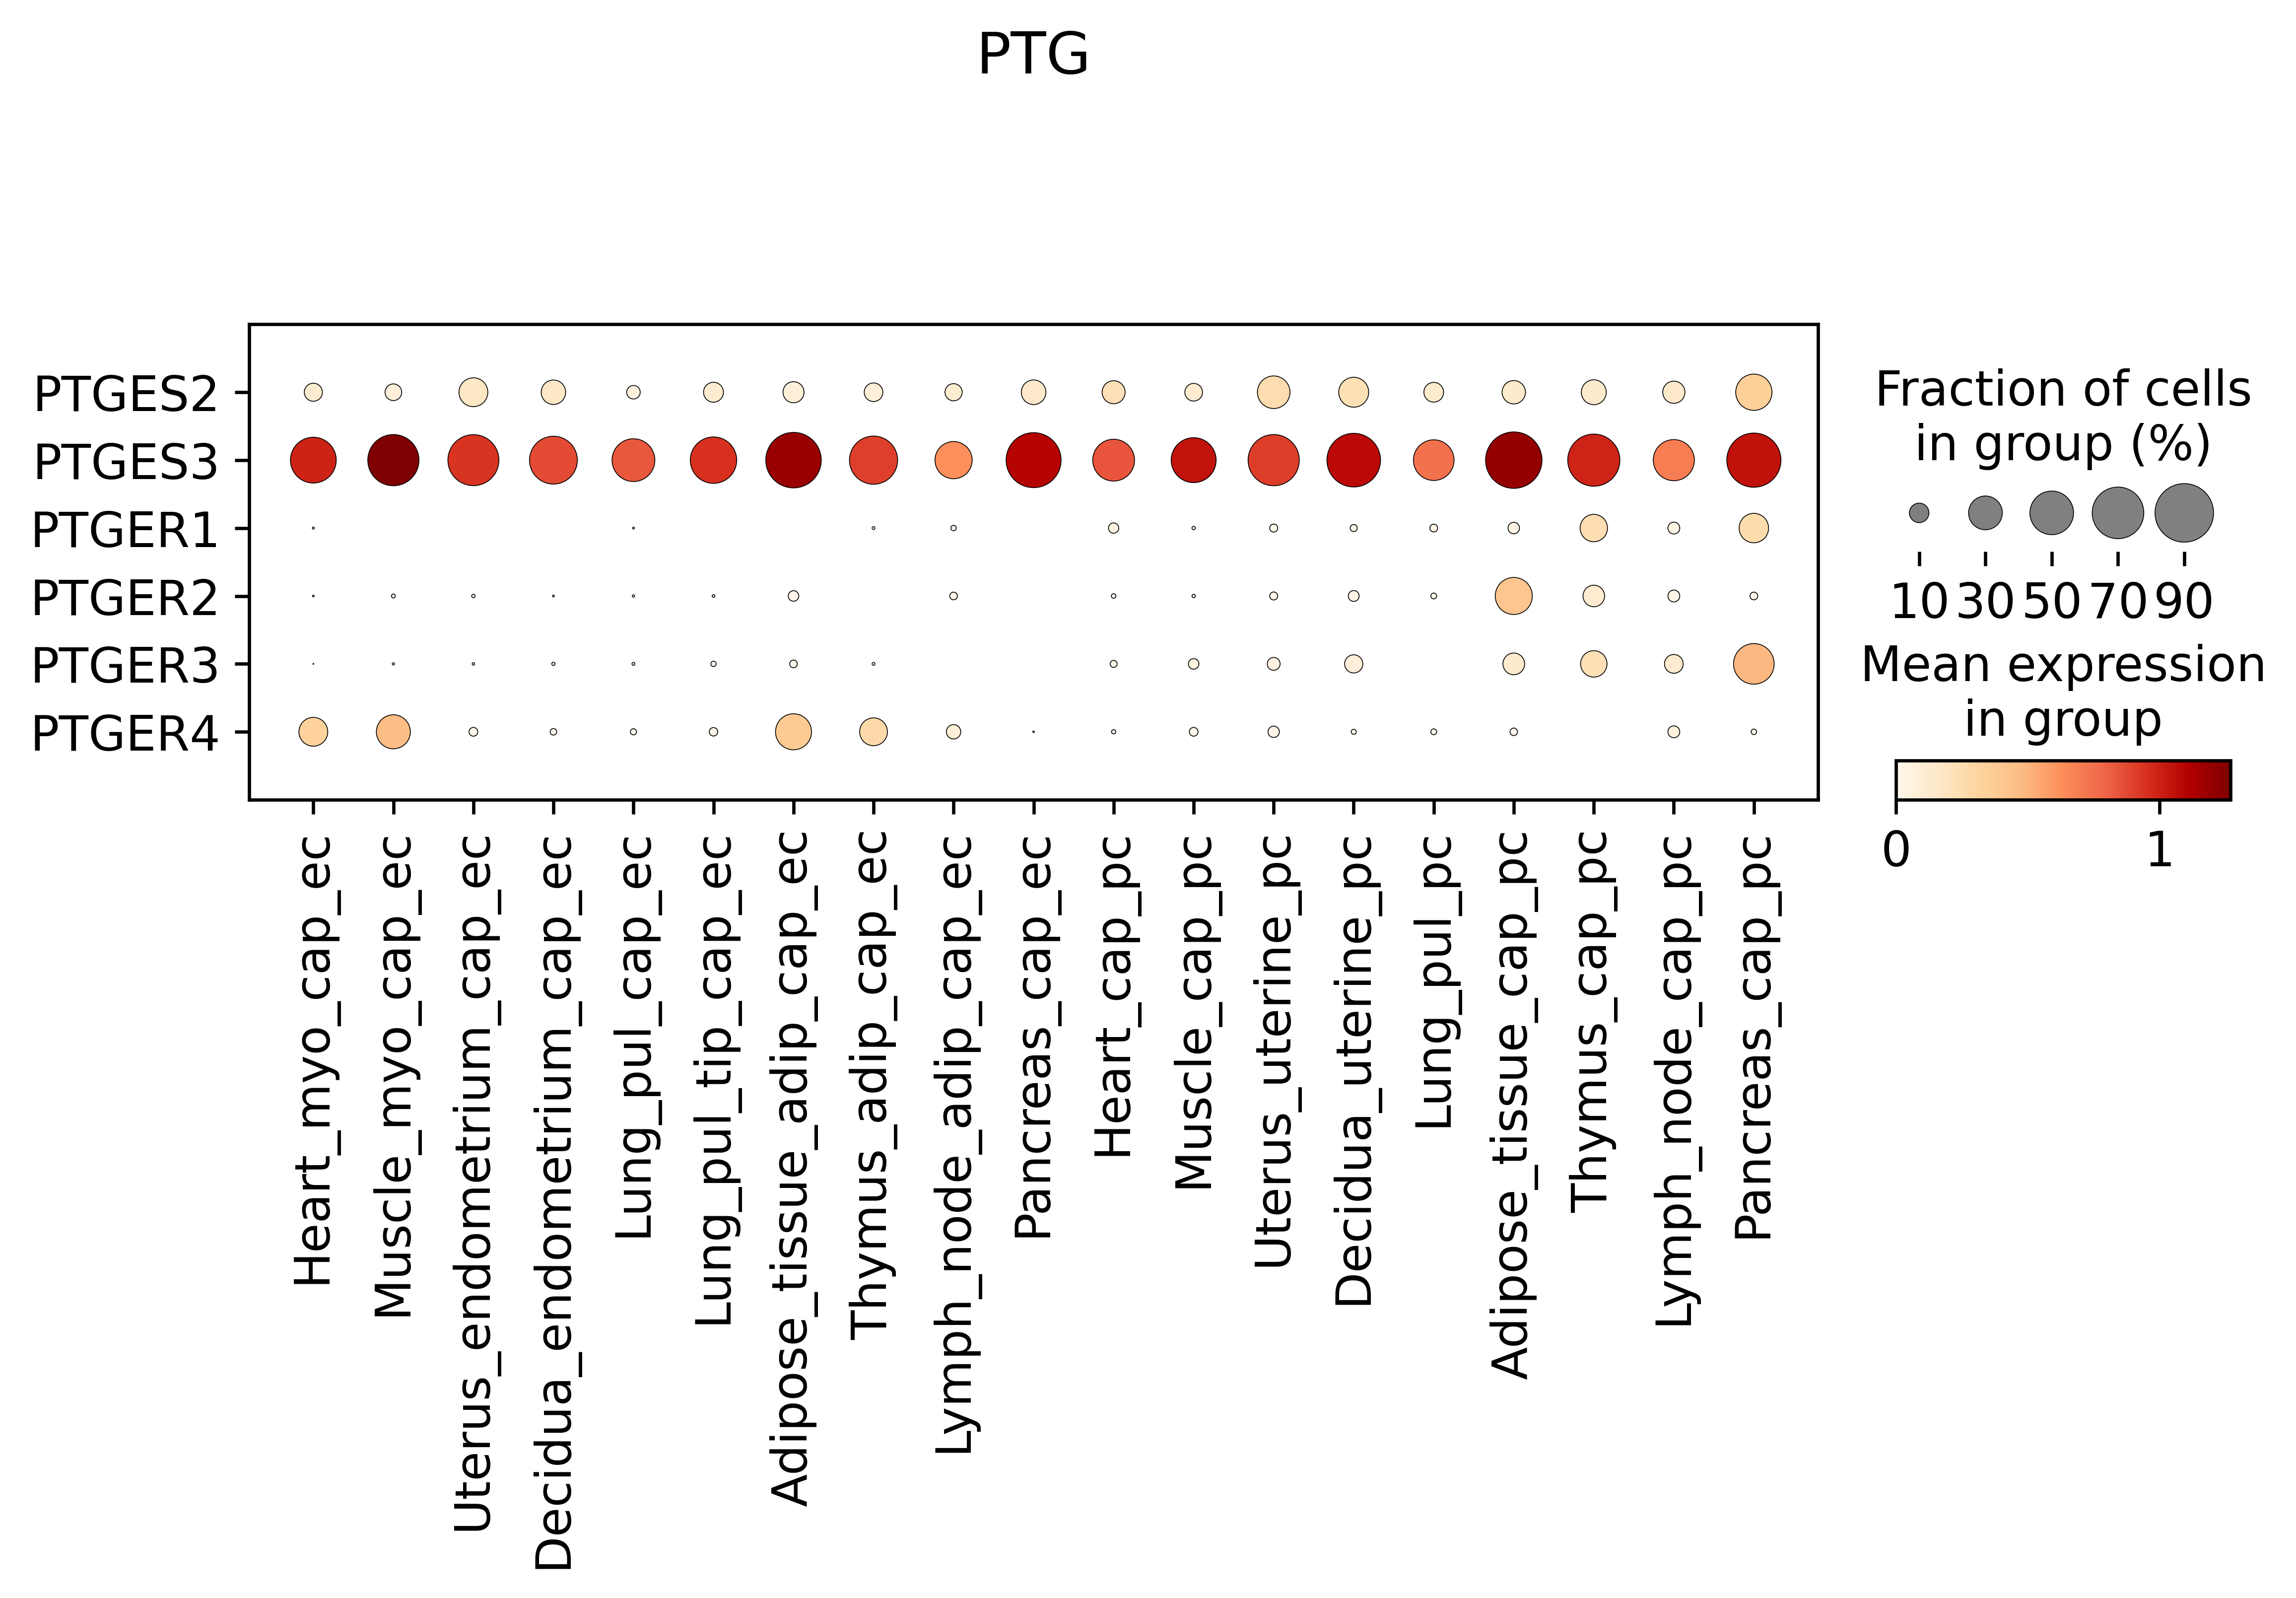

In [107]:
sc.pl.DotPlot(adata, ['PTGES2', 'PTGES3','PTGER1', 'PTGER2', 'PTGER3', 'PTGER4'], groupby='Organ_celltype', title="PTG", cmap="OrRd")  \
.style(size_exponent=1).swap_axes().show()

/nfs/team205/ac65/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


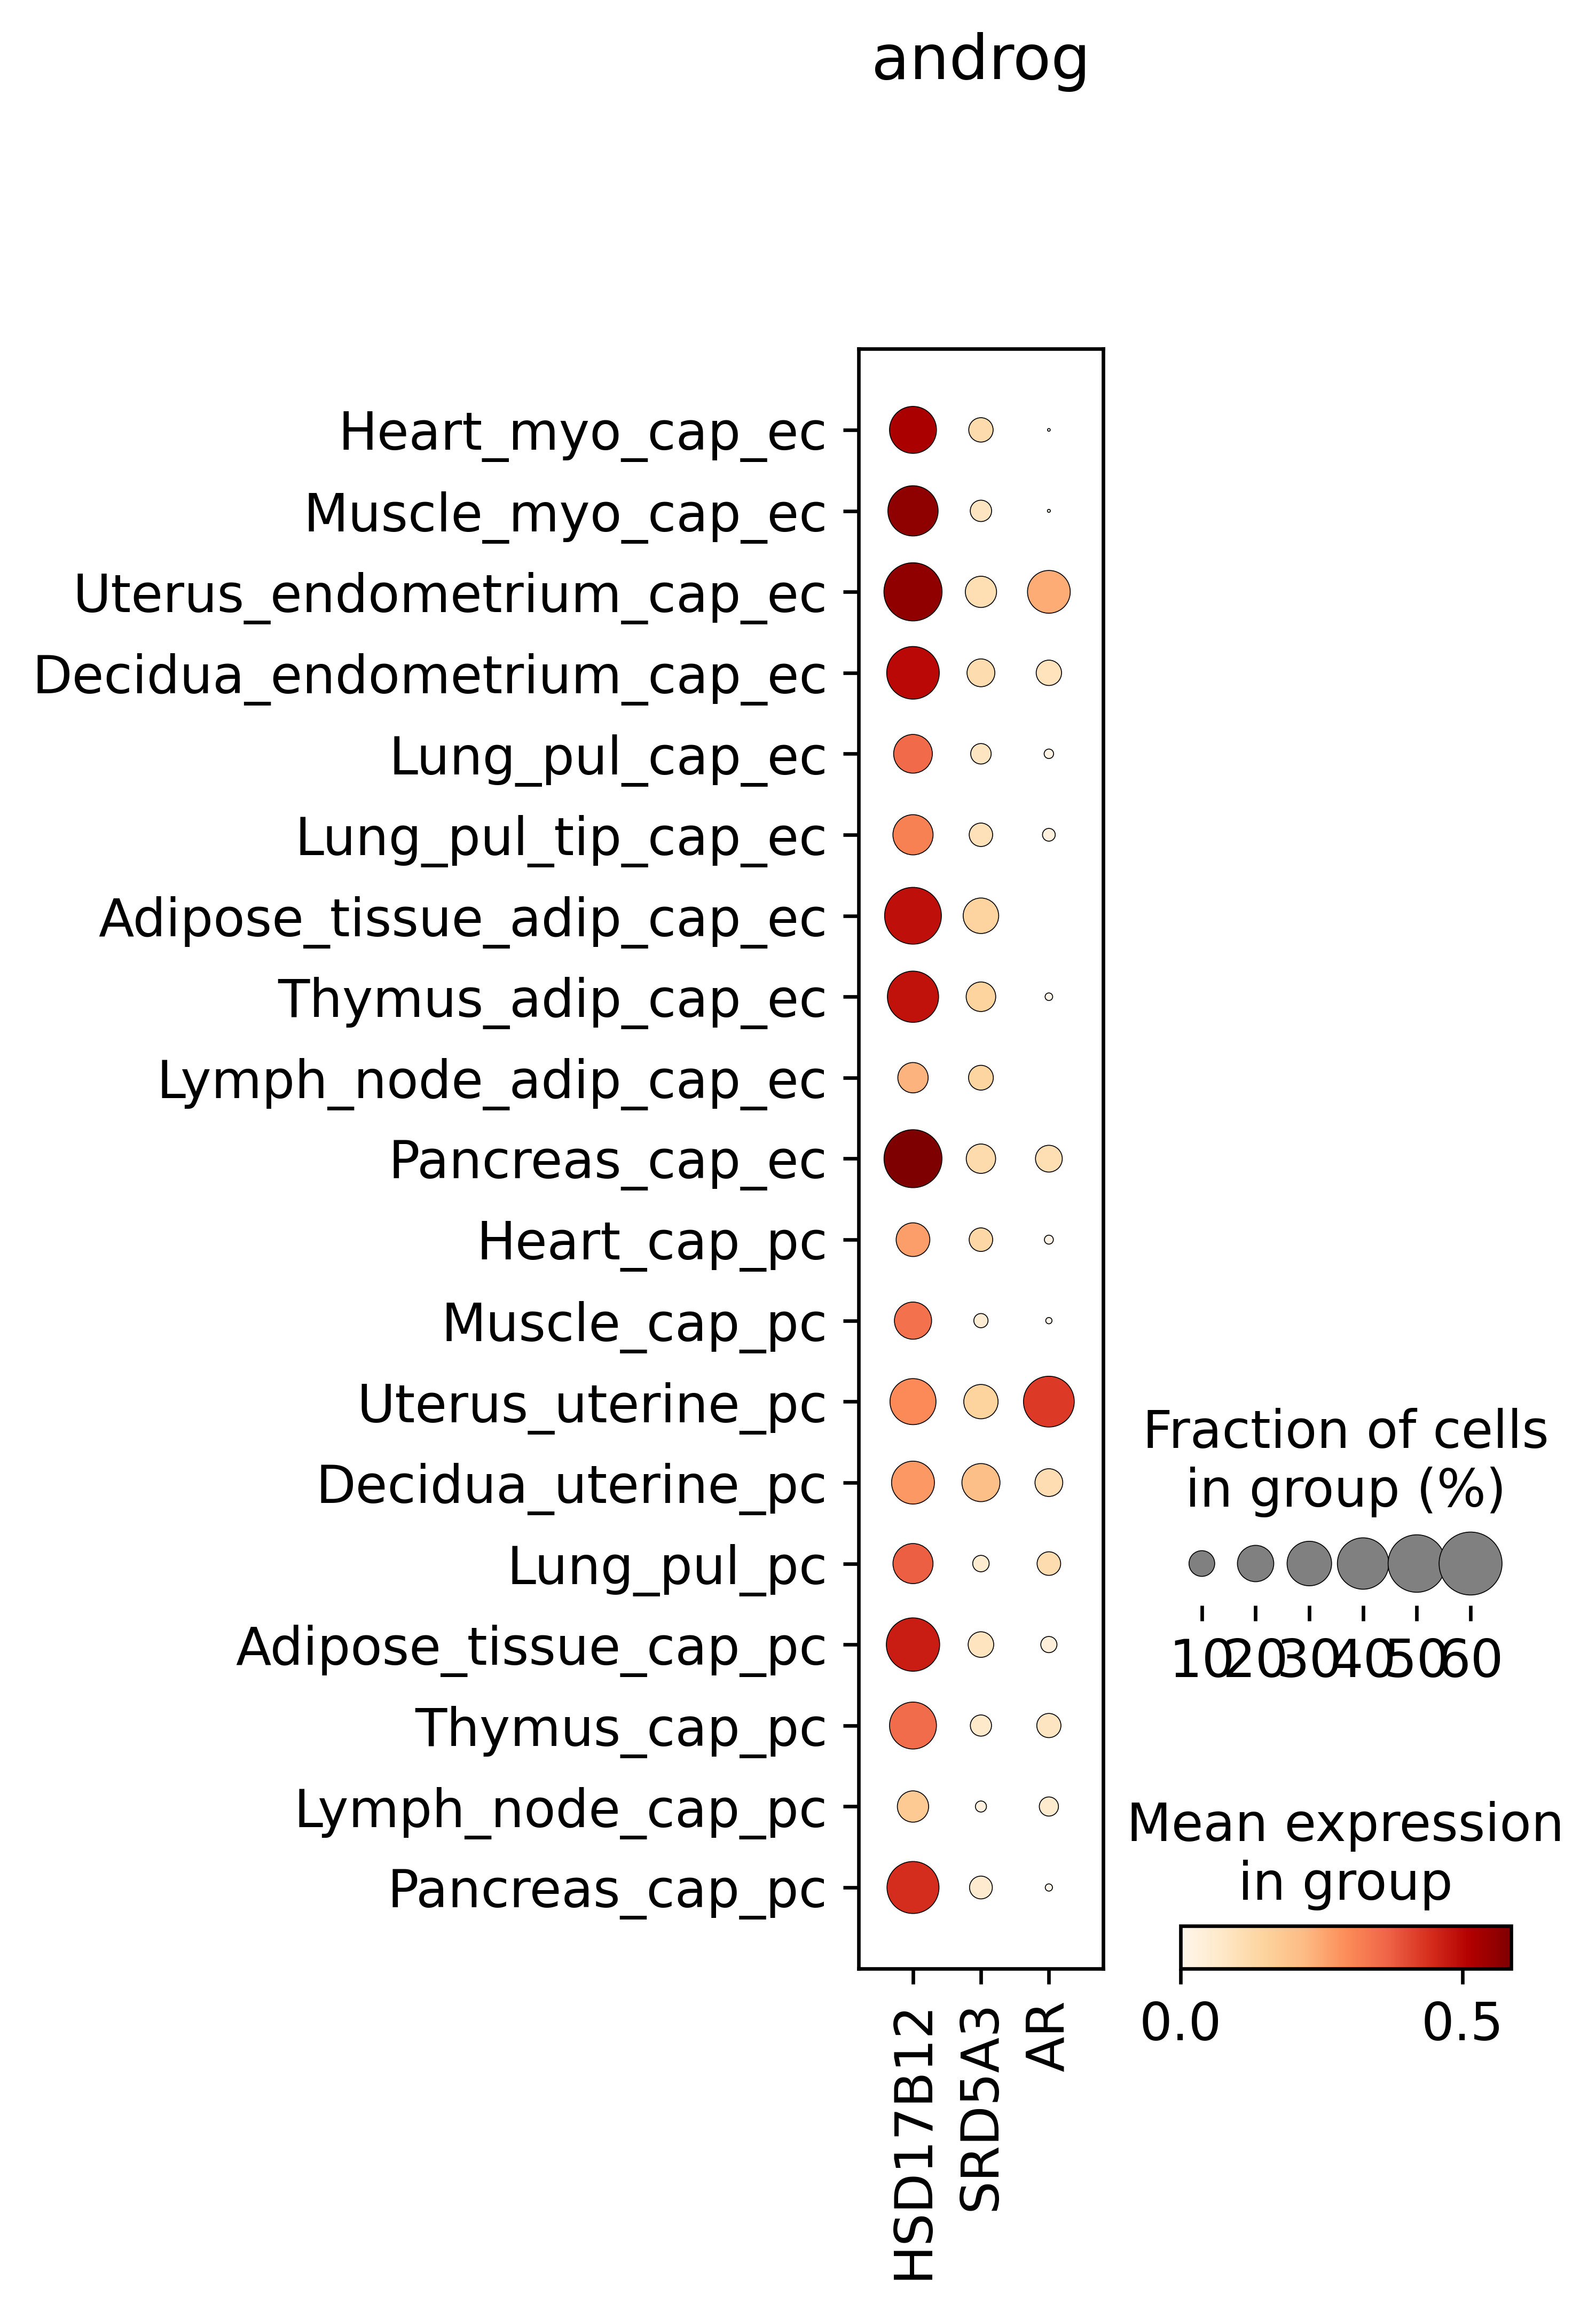

In [108]:
sc.pl.DotPlot(adata, ['HSD17B12', 'SRD5A3', 'AR'], groupby='Organ_celltype', title="androg", cmap="OrRd")  \
.style(size_exponent=1).show()

# ven_ec-smc

In [109]:
import numpy as np
import pandas as pd
adata = sc.read_h5ad('/nfs/team205/ac65/vasculature/after_annotation/annotated_objects/cpdb_in_stat/adata_for_cpdb_log1p.h5ad')

In [110]:
np.unique(adata.obs.Organ_celltype)

array(['Adipose_tissue_adip_cap_ec', 'Adipose_tissue_art_ec_2',
       'Adipose_tissue_art_smc', 'Adipose_tissue_cap_pc',
       'Adipose_tissue_myo_cap_ec', 'Adipose_tissue_ven_ec_2',
       'Bladder_art_smc', 'Bladder_cap_ec', 'Bladder_smc_pc_intermediate',
       'Bladder_uterine_pc', 'Brain_art_smc',
       'Brain_blood_brain_barrier_ec', 'Brain_brain_art_ec',
       'Brain_brain_art_smc', 'Brain_brain_ven_ec',
       'Brain_smc_pc_intermediate', 'Decidua_endometrium_cap_ec',
       'Decidua_uterine_pc', 'Heart_art_ec_1', 'Heart_art_ec_2',
       'Heart_art_smc', 'Heart_brain_art_smc', 'Heart_cap_pc',
       'Heart_endocardial_ec', 'Heart_myo_cap_ec', 'Heart_pul_ven_ec',
       'Heart_smc_pc_intermediate', 'Heart_ven_ec_1', 'Kidney_art_ec_2',
       'Kidney_art_smc', 'Kidney_glomeruli_ec', 'Kidney_kidney_art_ec',
       'Kidney_kidney_cap_ec', 'Large_intestine_art_ec_1',
       'Large_intestine_art_ec_2', 'Large_intestine_art_smc',
       'Large_intestine_cap_ec', 'Large_intestine_

In [111]:
adata = adata[adata.obs['Organ_celltype'].isin(['Heart_ven_ec_1', 'Uterus_ven_ec_1', 'Lung_ven_ec_1', 
                                                'Heart_smc_pc_intermediate', 'Uterus_smc_pc_intermediate', 'Lung_smc_pc_intermediate'])]

In [112]:
adata.obs['Organ_celltype']

CGATCGGGTGCCTGTG_HCAHeart7728607-0-0                                Heart_ven_ec_1
GCACTCTAGAAGAAGC_HCAHeart7728607-0-0                                Heart_ven_ec_1
GGCAATTTCTCGCATC_HCAHeart7728607-0-0                                Heart_ven_ec_1
CGTTCTGCAAGAAGAG_HCAHeart7728607-0-0                                Heart_ven_ec_1
TTGAACGCAGTGGGAT_HCAHeart7728607-0-0                                Heart_ven_ec_1
                                                                   ...            
GTCCACTTCCTACCGT_TSP4_Uterus_Myometrium_10X_1_1-34-1    Uterus_smc_pc_intermediate
AGAGAGCCATCAGCAT_TSP4_Uterus_Myometrium_10X_1_1-34-1    Uterus_smc_pc_intermediate
TGGTACAGTCAAGGCA_TSP4_Uterus_Myometrium_10X_1_1-34-1    Uterus_smc_pc_intermediate
CCAATTTGTATCTCTT_TSP4_Uterus_Myometrium_10X_1_1-34-1    Uterus_smc_pc_intermediate
ACTTAGGCACTATCCC_TSP4_Uterus_Myometrium_10X_1_1-34-1    Uterus_smc_pc_intermediate
Name: Organ_celltype, Length: 429, dtype: category
Categories (6, object): ['Heart_smc_

In [113]:
import pandas as pd
# Define the desired order of categories
desired_order = ['Heart_ven_ec_1', 'Uterus_ven_ec_1', 'Lung_ven_ec_1', 
                 'Heart_smc_pc_intermediate', 'Uterus_smc_pc_intermediate', 'Lung_smc_pc_intermediate']  # Replace with your desired category order

# Convert 'Organ_celltype' to a Categorical with the desired order
adata.obs['Organ_celltype'] = pd.Categorical(adata.obs['Organ_celltype'], categories=desired_order, ordered=True)

# Now, the 'Organ_celltype' categories are reordered as per your desired


/tmp/ipykernel_2087274/3104279088.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Organ_celltype'] = pd.Categorical(adata.obs['Organ_celltype'], categories=desired_order, ordered=True)


/nfs/team205/ac65/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


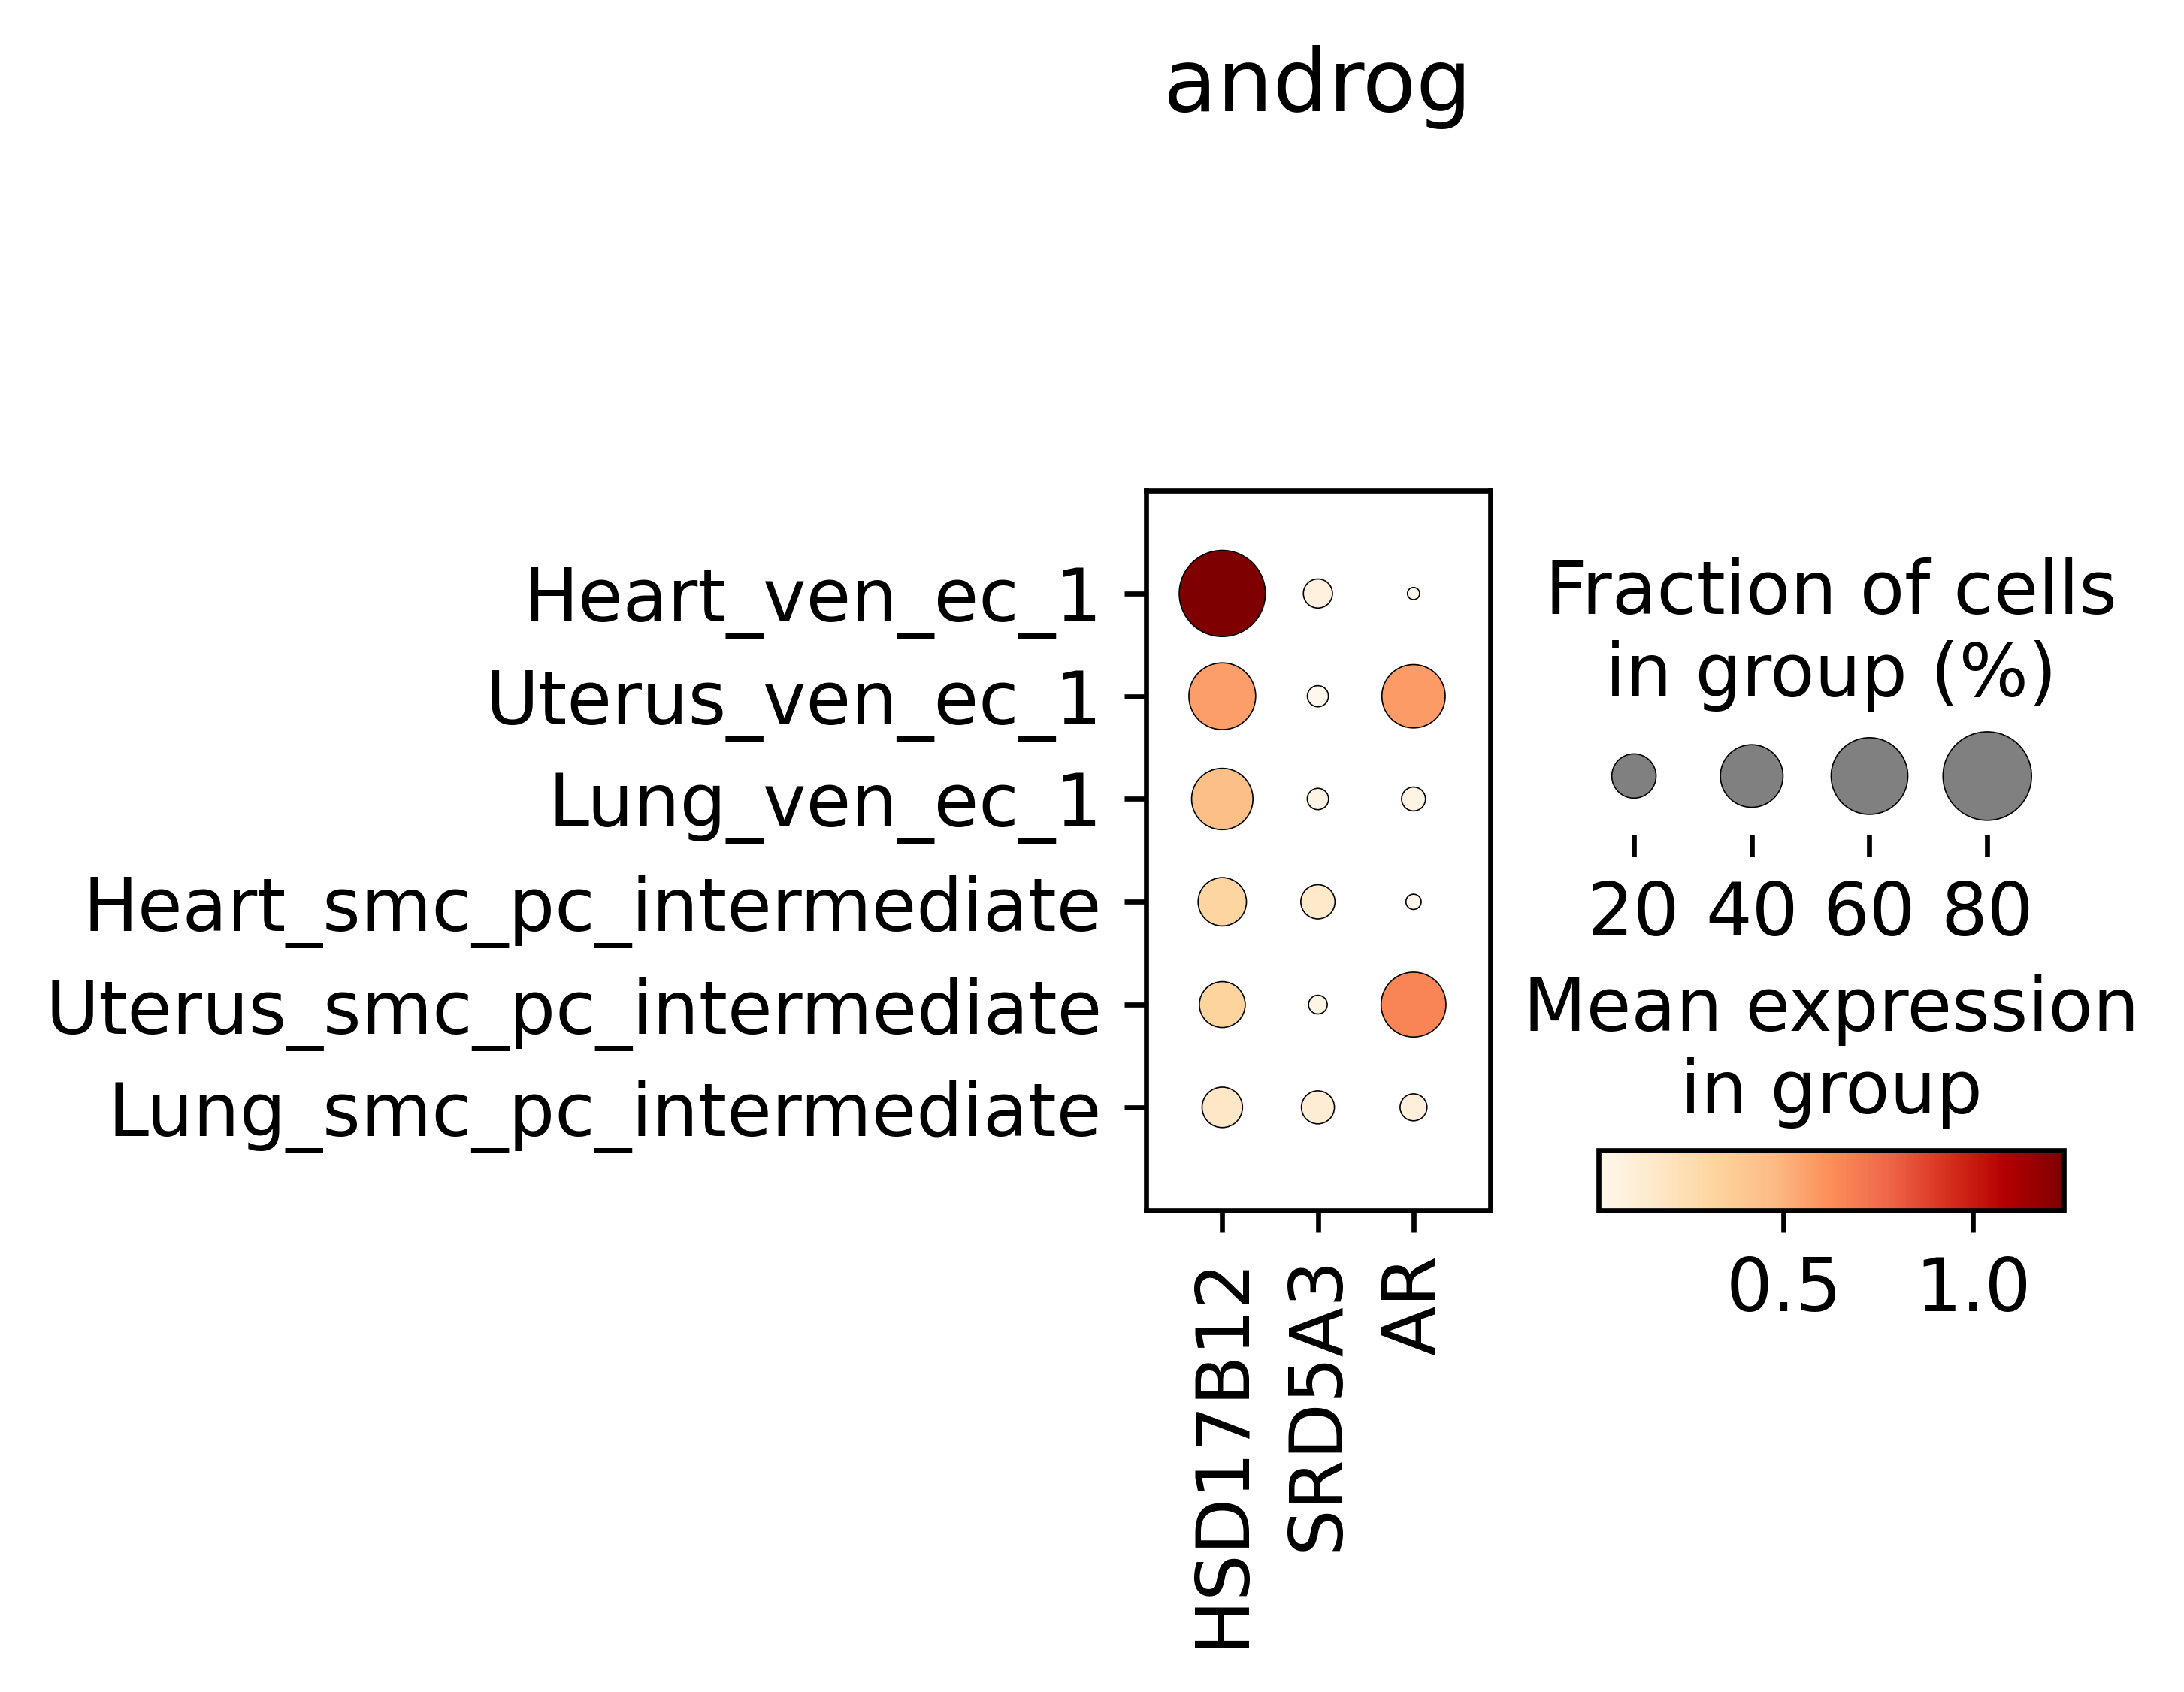

In [114]:
sc.pl.DotPlot(adata, ['HSD17B12', 'SRD5A3', 'AR'], groupby='Organ_celltype', 
                   title="androg", cmap="OrRd")  \
.style(size_exponent=1).show()